In [53]:
!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.1 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 390.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.0 MB 2.3 MB/s eta 0:00:19
   ---------------------------------------- 0.2/44.0 MB 2.5 MB/s eta 0:00:18
   ---------------------------------------- 0.3/44.0 MB 2.6 MB/s eta 0:00:17
   ---------------------------------------- 0.5/44.0 MB 3.0 MB/s eta 0:00:15
    --------------------------------------

In [13]:
from ipynb.fs.full.ThermoPropertiesNASA import thermo

In [14]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

**Part I - Introduction to thermodynamics Data**

In [15]:
species_list = ["O2","N2","CO2","H2O","CO","H2","xNO","C"]   # making a list of species
MW_species_list = [32, 28, 44, 18, 28, 2, 30, 12]     # molecular weight of the above species
Temperature = 2000   # K
enthalpy_species = np.zeros(len(species_list))   # defining the enthalpy_list
entropy_species =  np.zeros(len(species_list))      # defining the entropy_list

data_type = [('Species', '<U4'), ('MW', int), ('Enthalpy', float), ('Entropy', float)]

species_data = np.zeros(len(species_list), dtype=data_type)
#for j in range (4):
for i in range(len(species_list)):
    t = thermo(species_list[i],MW_species_list[i])
    species_data['Species'][i] = species_list[i]
    species_data['MW'][i] = MW_species_list[i]
    species_data['Enthalpy'][i] = round(t.h_mole(Temperature) / 1000,3)
    species_data['Entropy'][i] = round(t.s_mole(Temperature) / 1000,3)

# Making a table
header_name = ["Species", "Molecular Weight(g/mol)", "Enthalpy(KJ/mol)", "Entropy(KJ/mol-K)"]

table_data = [header_name, species_data[0], species_data[1], species_data[2],
             species_data[3], species_data[4],species_data[5],species_data[6],species_data[7] ]

format_string = "{:<10} {:>20} {:>35} {:>35}"
headers = table_data[0]
header_row = format_string.format(*headers)
print(header_row)
print("-" * len(header_row))

for data in table_data[1:]:
    print(format_string.format(*data))

Species    Molecular Weight(g/mol)                    Enthalpy(KJ/mol)                   Entropy(KJ/mol-K)
----------------------------------------------------------------------------------------------------------
O2                           32                              59.201                               0.269
N2                           28                              56.136                               0.252
CO2                          44                            -302.071                               0.309
H2O                          18                            -168.782                               0.265
CO                           28                             -53.799                               0.259
H2                            2                               52.95                               0.188
xNO                          30                             149.147                               0.273
C                            12                           

**Part II - Equilibrium Constant calculation** 

In [16]:
std_temp = 298  #K
temp_list = list(range(300,3050,100))     # temp_list
species_list = ["H2O","CO","CO2","xNO","C"]

# DATA DECLARATION ----------------------------------

# O2 data
entropy_data_O2 = np.zeros(len(temp_list))
enthalpy_data_O2 =  np.zeros(len(temp_list))

Molecule = "O2"
MW_molecule = 32
t = thermo(Molecule,MW_molecule)
entropy_std_O2 = t.s_mole(std_temp)
for i in range(len(temp_list)):
    enthalpy_data_O2[i] = t.h_mole(temp_list[i])
    entropy_data_O2[i] = t.s_mole(temp_list[i])
print(entropy_data_O2)
#------------------------------------------------------

# H2 data
entropy_data_H2 = np.zeros(len(temp_list))
enthalpy_data_H2 =  np.zeros(len(temp_list))
Molecule = "H2"
MW_molecule = 2
t = thermo(Molecule,MW_molecule)
entropy_std_H2 = t.s_mole(std_temp)
for i in range(len(temp_list)):
    enthalpy_data_H2[i] = t.h_mole(temp_list[i])
    entropy_data_H2[i] = t.s_mole(temp_list[i])

#------------------------------------------------------
    
# N2 data
entropy_data_N2 = np.zeros(len(temp_list))
enthalpy_data_N2 =  np.zeros(len(temp_list))
Molecule = "N2"
MW_molecule = 28
t = thermo(Molecule,MW_molecule)
entropy_std_N2 = t.s_mole(std_temp)
for i in range(len(temp_list)):
    enthalpy_data_N2[i] = t.h_mole(temp_list[i])
    entropy_data_N2[i] = t.s_mole(temp_list[i])

#------------------------------------------------------

# H2O data
enthalpy_data_H2O = np.zeros(len(temp_list))
entropy_data_H2O = np.zeros(len(temp_list))
gibbs_fof_H2O = np.zeros(len(temp_list))   #gibbs function of formation

Molecule = "H2O"
MW_molecule = 18
t = thermo(Molecule,MW_molecule)
enthalpy_std_H2O = t.h_mole(std_temp)
entropy_std_H2O = t.s_mole(std_temp)
for i in range(len(temp_list)):
    enthalpy_data_H2O[i] = t.h_mole(temp_list[i])
    entropy_data_H2O[i] = t.s_mole(temp_list[i])

#------------------------------------------------------

# CO data
enthalpy_data_CO = np.zeros(len(temp_list))
entropy_data_CO = np.zeros(len(temp_list))
gibbs_fof_CO = np.zeros(len(temp_list))   #gibbs function of formation

Molecule = "CO"
MW_molecule = 28 
t = thermo(Molecule,MW_molecule)
enthalpy_std_CO = t.h_mole(std_temp)
entropy_std_CO = t.s_mole(std_temp)
for i in range(len(temp_list)):
    enthalpy_data_CO[i] = t.h_mole(temp_list[i])
    entropy_data_CO[i] = t.s_mole(temp_list[i])

#--------------------------------------------------------
    
# CO2 data
enthalpy_data_CO2 = np.zeros(len(temp_list))
entropy_data_CO2 = np.zeros(len(temp_list)) 
gibbs_fof_CO2 = np.zeros(len(temp_list))   #gibbs function of formation

Molecule = "CO2"
MW_molecule = 44
t = thermo(Molecule,MW_molecule)
enthalpy_std_CO2 = t.h_mole(std_temp)
entropy_std_CO2 = t.s_mole(std_temp)
for i in range(len(temp_list)):
    enthalpy_data_CO2[i] = t.h_mole(temp_list[i])
    entropy_data_CO2[i] = t.s_mole(temp_list[i])
    
#---------------------------------------------------------

# NO data
enthalpy_data_NO = np.zeros(len(temp_list))
entropy_data_NO = np.zeros(len(temp_list))
gibbs_fof_NO = np.zeros(len(temp_list))   #gibbs function of formation

Molecule = "xNO"
MW_molecule = 30
t = thermo(Molecule,MW_molecule)
enthalpy_std_NO = t.h_mole(std_temp)
entropy_std_NO = t.s_mole(std_temp)
for i in range(len(temp_list)):
    enthalpy_data_NO[i] = t.h_mole(temp_list[i])
    entropy_data_NO[i] = t.s_mole(temp_list[i])
    
#----------------------------------------------------------

# C data
enthalpy_data_C = np.zeros(len(temp_list))
entropy_data_C = np.zeros(len(temp_list))
gibbs_fof_C = np.zeros(len(temp_list))   #gibbs function of formation

Molecule = "C"
MW_molecule = 12
t = thermo(Molecule,MW_molecule)
enthalpy_std_C = t.h_mole(std_temp)
entropy_std_C = t.s_mole(std_temp)
for i in range(len(temp_list)):
    enthalpy_data_C[i] = t.h_mole(temp_list[i])
    entropy_data_C[i] = t.s_mole(temp_list[i])

[205.3299882  213.87416559 220.69685636 226.45458706 231.47052522
 235.92663368 239.93800414 243.58584905 246.93256224 250.02293065
 252.89256044 255.57131218 258.08400202 260.45124079 262.69020449
 264.81528324 266.83860828 268.77047389 270.61967328 272.39376618
 274.09929252 275.74194396 277.32670212 278.85795087 280.33956784
 281.77499952 283.16732336 284.51929917]


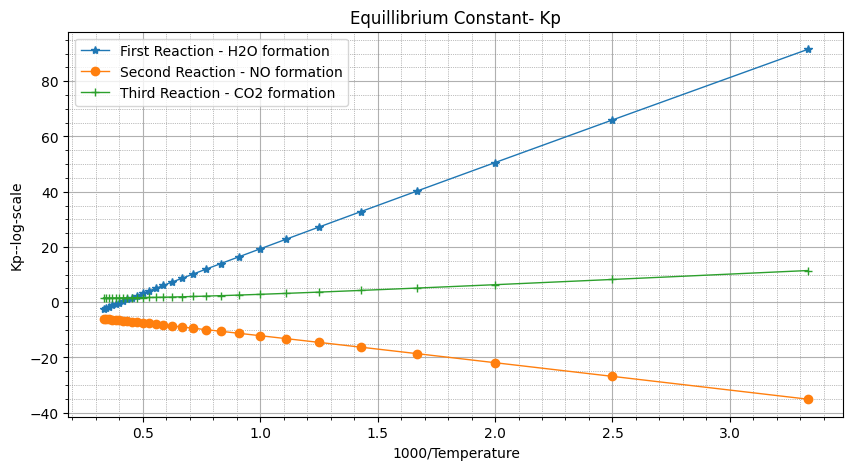

In [17]:
# CALCULATION OF GIBBS FUNCTION OF FORMATION


for i in range(len(temp_list)):
    # H20 
    gibbs_fof_H2O[i] = enthalpy_data_H2O[i] - (temp_list[i]*entropy_data_H2O[i])-\
    ((-1*(temp_list[i]*entropy_data_H2[i]))-(0.5*(temp_list[i]*entropy_data_O2[i])))
    
    # NO
    gibbs_fof_NO[i] = enthalpy_data_NO[i] - (temp_list[i]*entropy_data_NO[i])-\
    ((-0.5*(temp_list[i]*entropy_data_N2[i]))-(0.5*(temp_list[i]*entropy_data_O2[i])))
    
    # CO
    gibbs_fof_CO[i] = enthalpy_data_CO[i] - (temp_list[i]*entropy_data_CO[i])-\
    ((-1*(temp_list[i]*entropy_data_C[i]))-(0.5*(temp_list[i]*entropy_data_O2[i])) + (1*enthalpy_data_C[i]) )
    
    # CO2
    gibbs_fof_CO2[i] = enthalpy_data_CO2[i] - (temp_list[i]*entropy_data_CO2[i])-\
    ((-1*(temp_list[i]*entropy_data_C[i]))-(1*(temp_list[i]*entropy_data_O2[i])) + (1*enthalpy_data_C[i]) )

# CALCULATION OF STANDARD-STATE GIBBS CHANGE FUNCTION (gibbs_sscf)

#----------------------------------------------------------------------
# first reaction (first_rec) -  a H2 + b O2 == c H2O
# here,   a = 1, b = 0.5, c = 1
a = 1
b = 0.5
c = 1
gibbs_sscf_first_rec = np.zeros(len(temp_list))

for i in range(len(temp_list)):
    gibbs_sscf_first_rec[i] = (c*gibbs_fof_H2O[i])

#----------------------------------------------------------------------
# second reaction (second_rec) -  a N2 + b O2 == c NO
# here,   a = 0.5, b = 0.5, c = 1
a = 0.5
b = 0.5
c = 1
gibbs_sscf_second_rec = np.zeros(len(temp_list))

for i in range(len(temp_list)):
    gibbs_sscf_second_rec[i] = (c*gibbs_fof_NO[i])

#----------------------------------------------------------------------
# third reaction (third_rec) -  a CO + b H2O == c H2 + d CO2
# here,   a = 1, b = 1, c = 1, d = 1
a = 1
b = 1
c = 1
d = 1
gibbs_sscf_third_rec = np.zeros(len(temp_list))

for i in range(len(temp_list)):
    gibbs_sscf_third_rec[i] = (d*gibbs_fof_CO2[i]) - (b*gibbs_fof_H2O[i]) - (a*gibbs_fof_CO[i])

# CALCULATION OF EQUILLIBRIUM CONSTANT (Kp - equ_const)

Ru = 8.31446  # characteristic gas constant ( J/mol-K)

#----------------------------------------------------------------------
# first reaction (first_rec) -  a H2 + b O2 == c H2O
# here,   a = 1, b = 0.5, c = 1
equ_const_first_rec = np.zeros(len(temp_list))

for i in range(len(temp_list)):
    equ_const_first_rec[i] = math.exp(-gibbs_sscf_first_rec[i]/(Ru*temp_list[i]))

#----------------------------------------------------------------------
# second reaction (second_rec) -  a N2 + b O2 == c NO
# here,   a = 0.5, b = 0.5, c = 1
equ_const_second_rec = np.zeros(len(temp_list))

for i in range(len(temp_list)):
    equ_const_second_rec[i] = math.exp(-gibbs_sscf_second_rec[i]/(Ru*temp_list[i]))
    
#----------------------------------------------------------------------
# third reaction (third_rec) -  a CO + b H2O == c H2 + d CO2
# here,   a = 1, b = 1, c = 1, d = 1
equ_const_third_rec = np.zeros(len(temp_list))

for i in range(len(temp_list)):
    equ_const_third_rec[i] = math.exp(-gibbs_sscf_third_rec[i]/(Ru*temp_list[i]))

#print(equ_const_first_rec)

# PLOTTING THE Kp

temp_list_inv = np.zeros(len(temp_list)) 
equ_const_first_rec_log = np.zeros(len(temp_list))
equ_const_second_rec_log = np.zeros(len(temp_list))
equ_const_third_rec_log = np.zeros(len(temp_list))

for i in range(len(temp_list)):    
    temp_list_inv[i] = 1000 / temp_list[i]
    equ_const_first_rec_log[i] = np.log(equ_const_first_rec[i])
    equ_const_second_rec_log[i] = np.log(equ_const_second_rec[i]) 
    equ_const_third_rec_log[i] = np.log(equ_const_third_rec[i])

# Plot Definition
figId = plt.figure(figsize=(10,5))
plt.plot(temp_list_inv, equ_const_first_rec_log, lw=1, marker = '*', label = 'First Reaction - H2O formation') 
plt.plot(temp_list_inv, equ_const_second_rec_log, lw=1, marker='o', label = 'Second Reaction - NO formation') 
plt.plot(temp_list_inv, equ_const_third_rec_log, lw=1, marker='+', label = 'Third Reaction - CO2 formation') 

# Text Formating
plt.title('Equillibrium Constant- Kp', fontsize = 12)
plt.xlabel('1000/Temperature')
plt.ylabel('Kp--log-scale')

plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# Figure Formating
plt.show()



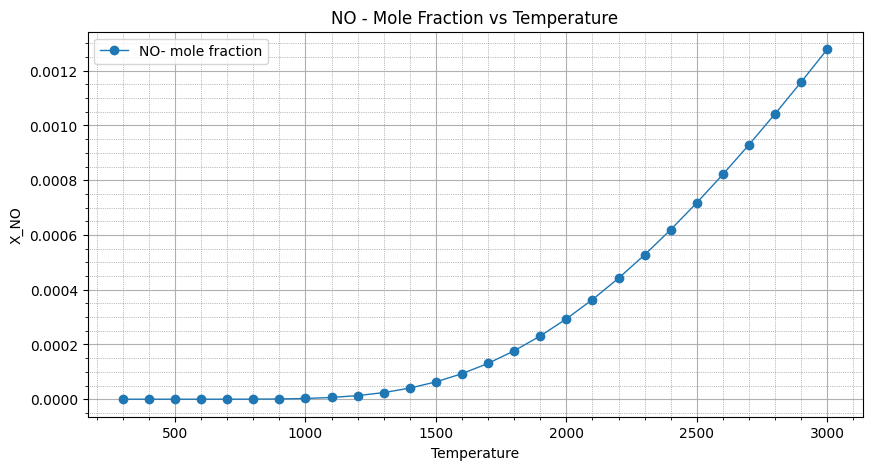

In [18]:
# calculate 𝑋𝑁𝑂 for 𝑁2 + 𝑂2 ↔ 2𝑁𝑂, for normal air composition.
temp_list = list(range(300,3050,100)) 
for i in range(len(temp_list)):
   
    # NO
    gibbs_fof_NO[i] = (1*enthalpy_data_NO[i]) - (1*temp_list[i]*entropy_data_NO[i])-\
    ((-0.5*(temp_list[i]*entropy_data_N2[i]))-(0.5*(temp_list[i]*entropy_data_O2[i])))

equ_const_second_rec = np.zeros(len(temp_list))
gibbs_sscf_second_rec = np.zeros(len(temp_list))

for i in range(len(temp_list)):
    gibbs_sscf_second_rec[i] = (2*gibbs_fof_NO[i])
for i in range(len(temp_list)):
    equ_const_second_rec[i] = math.exp(-gibbs_sscf_second_rec[i]/(Ru*temp_list[i]))
#print(equ_const_second_rec)

molar_fraction_NO = np.zeros(len(temp_list)) 

for i in range(len(temp_list)):
    molar_fraction_NO[i] = math.sqrt(equ_const_second_rec[i])/(2 + (math.sqrt(equ_const_second_rec[i])))

#print(molar_fraction_NO)

# Plot Definition
figId = plt.figure(figsize=(10,5))
plt.plot(temp_list, molar_fraction_NO, lw=1, marker = 'o', label = 'NO- mole fraction')
# Text Formating
plt.title('NO - Mole Fraction vs Temperature', fontsize = 12)
plt.xlabel('Temperature')
plt.ylabel('X_NO')

plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# Figure Formating
plt.show()

**Part III (Incomplete combustion) - Question 2 - HHV & LHV**

In [19]:
gas = ct.Solution('Jerzembeck.yaml')
species_list = ["C8H18","O2","N2","CO2","H2O","CO","H2"]   # making a list of species
MW_species_list = [114.232, 32, 28, 44, 18, 28, 2]     # molecular weight of the above species
Temperature = 300   # K
enthalpy_species = np.zeros(len(species_list))   # defining the enthalpy_list
entropy_species =  np.zeros(len(species_list))      # defining the entropy_list
specific_heat_species = np.zeros(len(species_list))      # defining the specific heat_list

data_type = [('Species', '<U5'), ('MW', int), ('Enthalpy', float), ('Entropy', float), ('Specific_heat', float)]

species_data = np.zeros(len(species_list), dtype=data_type)
#for j in range (4):
for i in range(len(species_list)):
    t = thermo(species_list[i],MW_species_list[i])
    species_data['Species'][i] = species_list[i]
    species_data['MW'][i] = MW_species_list[i]
    species_data['Enthalpy'][i] = t.h_mole(Temperature) 
    species_data['Entropy'][i] = t.s_mole(Temperature) 
    species_data['Specific_heat'][i] = t.cp_mole(Temperature)

print(species_data)

h_vaporization_H2O = 44010                   # enthalpy of vaporization of water in KJ/Kmol ( from book Stephen Turns)
hf_H2O_g = species_data[4][2]                # enthalpy of formation of water_gas
hf_C8H18_g = species_data[0][2]                # enthalpy of formation of water_gas
hf_CO2_g = species_data[3][2]                # enthalpy of formation of water_gas
hf_H20_l = hf_H2O_g - h_vaporization_H2O     # enthalpy of formation of water_liquid

# using the stoichiometric reaction coeffient of iso-octane
#    C8H18 + 12.5(O2+3.76 N2) == 8 CO2 + 9 H2O + 47 N2
a = 1                                        # 1 mole of iso-octane
b = 12.5                                     # 12.5 mole of air
c = 8                                        # 8 mole of carbon dioxide
d = 9                                        # 9 mole of water
Heat_combustion_H2O_l = (a*hf_C8H18_g) - ((c*hf_CO2_g)+(d*hf_H20_l))   # heat of combustion_water_liquid
Heat_combustion_H2O_g = (a*hf_C8H18_g) - ((c*hf_CO2_g)+(d*hf_H2O_g))   # heat of combustion_water_gas
print(Heat_combustion_H2O_l)
print(Heat_combustion_H2O_g)
HHV_iso_octane = Heat_combustion_H2O_l / species_data[0][1]
LHV_iso_octane = Heat_combustion_H2O_g / species_data[0][1]
print(HHV_iso_octane-363)
print(LHV_iso_octane-363)

[('C8H18', 114, -2.23659113e+05, 424.25663786, 189.47225847)
 ('O2',  32,  5.43580557e+01, 205.3299882 ,  29.38733433)
 ('N2',  28,  5.38805003e+01, 191.78871702,  29.12501313)
 ('CO2',  44, -3.93438855e+05, 214.01608622,  37.21988564)
 ('H2O',  18, -2.41762402e+05, 189.0357695 ,  33.59572348)
 ('CO',  28, -1.10480618e+05, 197.83889603,  29.14267101)
 ('H2',   2,  5.33587790e+01, 130.85864166,  28.84893824)]
5495803.342985634
5099713.342985634
47845.801254259946
44371.32757004942


**Part III (Incomplete combustion) - Question 3 - Temperature adiabatic estimation**

In [4]:
# Constants
R = 8.314  # KJ/kmol/K (universal gas constant)
Cp = 3.5 * R   # Constant heat capacity (KJ/kmol/K)

# Equivalence ratios to consider
equivalence_ratios = np.arange(0.5, 1.55, 0.05)

# Initialize empty list to store results
Temp_adiabatic_estimation = np.zeros(len(equivalence_ratios))

'''
aC8H18 + 12.5*phi*(O2+3.76 N2) == b CO2 + c H2O + d CO + e H2 + 3.76*12.5*phi N2
where, a = 12.5*phi , phi - equivalence ratio
d = e ( for water gas shift reaction 1 mole of CO produces 1 mole of H2)
f = 3.76 a
b = 9d (we will assume XCO2 = 9⸳XCO)

'''

for index, phi in enumerate(equivalence_ratios):
    #print(phi)
   
    if (phi >= 0.5 and phi < 1):
        # the reaction - aC8H18 + 12.5(O2+3.76 N2) == b CO2 + c H2O + d CO + e H2 + g N2 + f O2
        d = 0
        b = 8*phi
        a = phi
        c = 9*phi
        e = 0
        f = 12.5*(1-phi)
        g = 47
        H_reactants = a*species_data[0][2]        # enthalpy of reaction
        #print(H_reactants)
        # h_specific_combined = Ni*Cp*(T_adiabatic-300)
        h_specific_combined = H_reactants - ((b*species_data[3][2])+(d*species_data[5][2])+(c*species_data[4][2]))
        #print(h_specific_combined)
        Temp_adiabatic_estimation[index] = (h_specific_combined/((b*Cp)+(c*Cp)+(d*Cp)+(e*Cp)+(f*Cp)+(g*Cp)))+300
    
    if (phi >= 1 and phi < 1.05):
        # the reaction - aC8H18 + 12.5(O2+3.76 N2) == b CO2 + c H2O + d CO + e H2 + g N2 
        d = 0
        b = 8
        a = 1
        c = 9
        e = 0
        g = 47
        H_reactants = a*species_data[0][2]        # enthalpy of reaction
        # h_specific_combined = Ni*Cp*(T_adiabatic-300)
        h_specific_combined = H_reactants - ((b*species_data[3][2])+(c*species_data[4][2]))  
        Temp_adiabatic_estimation[index] = (h_specific_combined/((b*Cp)+(c*Cp)+(e*Cp)+(g*Cp)))+300
    
    if (phi > 1.01 and phi <= 2):
        # the reaction - aC8H18 + 12.5(O2+3.76 N2) == b CO2 + c H2O + d CO + e H2 + g N2 + f O2
        d = 0.8*phi
        b = 7.2*phi
        a = phi
        c = (25-(15.2*phi))
        e = (24.2*phi)-25
        f = 0
        g = 47
        H_reactants = a*species_data[0][2]        # enthalpy of reaction
        # h_specific_combined = Ni*Cp*(T_adiabatic-300)
        h_specific_combined = H_reactants - ((b*species_data[3][2])+(d*species_data[5][2])+(c*species_data[4][2]))  
        Temp_adiabatic_estimation[index] = (h_specific_combined/((b*Cp)+(f*Cp)+(c*Cp)+(e*Cp)+(g*Cp)))+300
    
    #Temp_adiabatic_estimation.append(Temp_adiabatic_estimation)  

print(Temp_adiabatic_estimation)       

[1719.05994877 1855.29886277 1990.55212546 2124.83039467 2258.14417512
 2390.50382115 2521.91953944 2652.40139159 2781.95929671 2910.60303394
 3038.34224489 2993.9862536  2934.41510306 2876.31439689 2819.63035454
 2764.31178651 2710.30994021 2657.57835659 2606.07273688 2555.75081846
 2506.5722592 ]


**Part III (Incomplete combustion) - Question 4 - Temperature adiabatic integration**

In [6]:
from scipy.integrate import quad
from scipy.optimize import fsolve

In [7]:
# Constants
Ru = 8.314  # KJ/kmol/K (universal gas constant)

# specific heat of CO2

def integrand(T, a0, a1, a2, a3, a4, a5, a6):
    return Ru*(a0*T**(-2) + a1*T**(-1) + a2 + a3*T + a4*T**2 + a5*T**3 + a6*T**4)
# Create an instance of the thermo class
def species(species_name, molecular_weight, temperature):
    
    name = species_name                 # Replace with the species name you want
    species_MW = molecular_weight       # Replace with the species molecular weight in kg/kmol
    temp = temperature
    thermo_instance = thermo(species_name, species_MW)
    
    if (temp <= 1000.5):
        # Access and print the value of a_lo
        a_value = thermo_instance.cymalalo()
    else:
        a_value = thermo_instance.cymalahi()
    Temp_lower = 300
    Temp_upper = temp
    a0 = a_value[0]
    a1 = a_value[1]
    a2 = a_value[2]
    a3 = a_value[3]
    a4 = a_value[4]
    a5 = a_value[5]
    a6 = a_value[6]
    
    result, _ = quad(integrand, Temp_lower, Temp_upper, args=(a0, a1, a2, a3, a4, a5, a6))
    return result
print(species("CO2",44,400))
#print("a_lo:", a_value)

3934.623584873121


In [8]:


#Cp = 3.5 * R   # Constant heat capacity (J/kmol/K)

# Equivalence ratios to consider
equivalence_ratios = np.arange(0.5, 1.55, 0.05)

# Initialize empty list to store results
Temp_adiabatic_integration = np.zeros(len(equivalence_ratios))
Temp_testing = np.arange(300, 4000, 2.5)
#print(Temp_testing)

tol = 5000    # tolerance limit for finding the correct temp_adiabatic_integration
for index, phi in enumerate(equivalence_ratios):
    print(phi)

    if (phi >= 0.5 and phi < 1):
        # the reaction - aC8H18 + 12.5*phi(O2+3.76 N2) == b CO2 + c H2O + d CO + e H2 + g N2 + f O2
        d = 0
        b = 8*phi
        a = phi
        c = 9*phi
        e = 0
        f = 12.5*(1-phi)
        g = 47
        H_reactants = a*species_data[0][2]        # enthalpy of reaction
        #print(H_reactants)
        # h_specific_combined = Ni*Cp*(T_adiabatic-300)
        for temp in Temp_testing:
            #print(temp)
            
            h_CO2 = b*(species_data[3][2]+species("CO2",44,temp))
            h_CO = d*(species_data[5][2]+species("CO",28,temp))
            h_H2 = e*(species_data[6][2]+species("H2",2,temp))
            h_N2 = g*(species_data[2][2]+species("H2",28,temp))
            h_H2O = c*(species_data[4][2]+species("H2O",18,temp))
            h_O2 = f*(species_data[1][2]+species("O2",32,temp))

            H_products = h_CO2 + h_CO + h_H2 + h_N2 + h_H2O + h_O2
            difference_h = abs(H_products - H_reactants)
            #print(difference_h)
            if difference_h < tol:
                print(temp)
                Temp_adiabatic_integration[index] = temp
                break
    
    if (phi >= 1 and phi < 1.05):
        # the reaction - aC8H18 + 12.5*phi(O2+3.76 N2) == b CO2 + c H2O + d CO + e H2 + 3.76*12.5*phi N2 + f O2 
        d = 0
        b = 8
        a = 1
        c = 9
        e = 0
        g = 47
        H_reactants = a*species_data[0][2]        # enthalpy of reaction
        for temp in Temp_testing:
            #print(temp)
            
            h_CO2 = b*(species_data[3][2]+species("CO2",44,temp))
            h_CO = d*(species_data[5][2]+species("CO",28,temp))
            h_H2 = e*(species_data[6][2]+species("H2",2,temp))
            h_N2 = g*(species_data[2][2]+species("H2",28,temp))
            h_H2O = c*(species_data[4][2]+species("H2O",18,temp))
            h_O2 = f*(species_data[1][2]+species("O2",32,temp))

            H_products = h_CO2 + h_CO + h_H2 + h_N2 + h_H2O + h_O2
            difference_h = abs(H_products - H_reactants)
            if difference_h < tol:
                print(temp)
                Temp_adiabatic_integration[index] = temp
                break
    
    if (phi > 1.01 and phi <= 2):
        # the reaction - aC8H18 + 12.5*phi(O2+3.76 N2) == b CO2 + c H2O + d CO + e H2 + 3.76*12.5*phi N2 + f O2
        d = 0.8*phi
        b = 7.2*phi
        a = phi
        c = (25-(15.2*phi))
        e = (24.2*phi)-25
        f = 0
        g = 47
        H_reactants = a*species_data[0][2]        # enthalpy of reaction
        for temp in Temp_testing:
            #print(temp)
            
            h_CO2 = b*(species_data[3][2]+species("CO2",44,temp))
            h_CO = d*(species_data[5][2]+species("CO",28,temp))
            h_H2 = e*(species_data[6][2]+species("H2",2,temp))
            h_N2 = g*(species_data[2][2]+species("H2",28,temp))
            h_H2O = c*(species_data[4][2]+species("H2O",18,temp))
            h_O2 = f*(species_data[1][2]+species("O2",32,temp))

            H_products = h_CO2 + h_CO + h_H2 + h_N2 + h_H2O + h_O2
            difference_h = abs(H_products - H_reactants)
            if difference_h < tol:
                print(temp)
                Temp_adiabatic_integration[index] = temp
                break
    
    #Temp_adiabatic_estimation.append(Temp_adiabatic_estimation)  

print(Temp_adiabatic_integration)  

[ 300.   302.5  305.  ... 3992.5 3995.  3997.5]
0.5
1497.5
0.55
1602.5
0.6000000000000001
1702.5
0.6500000000000001
1797.5
0.7000000000000002
1892.5
0.7500000000000002
1982.5
0.8000000000000003
2072.5
0.8500000000000003
2157.5
0.9000000000000004
2242.5
0.9500000000000004
2322.5
1.0000000000000004
2387.5
1.0500000000000005
2357.5
1.1000000000000005
2317.5
1.1500000000000006
2282.5
1.2000000000000006
2245.0
1.2500000000000007
2207.5
1.3000000000000007
2172.5
1.3500000000000008
2137.5
1.4000000000000008
2102.5
1.4500000000000008
2070.0
1.5000000000000009
2035.0
[1497.5 1602.5 1702.5 1797.5 1892.5 1982.5 2072.5 2157.5 2242.5 2322.5
 2387.5 2357.5 2317.5 2282.5 2245.  2207.5 2172.5 2137.5 2102.5 2070.
 2035. ]


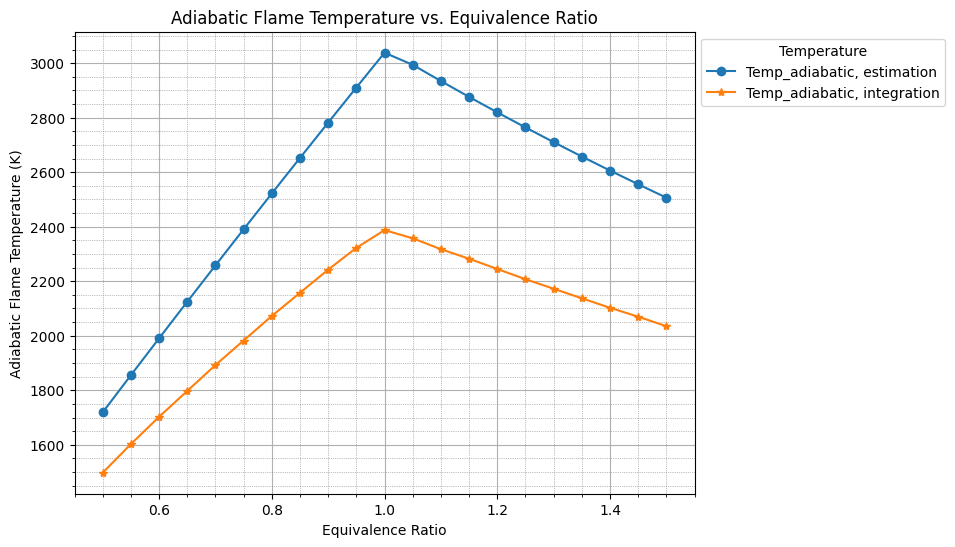

In [11]:
#print(Temp_adiabatic_integration)  
#print(Temp_adiabatic_estimation)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(equivalence_ratios, Temp_adiabatic_estimation, marker='o', label = "Temp_adiabatic, estimation")
plt.plot(equivalence_ratios, Temp_adiabatic_integration, marker='*',label = "Temp_adiabatic, integration")
plt.xlabel('Equivalence Ratio')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Adiabatic Flame Temperature vs. Equivalence Ratio')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc='upper left', title='Temperature', bbox_to_anchor=(1, 1))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()



**Temperature adiabatic flame temperature**

In [7]:
#g = ct.Solution('Jerzembeck.yaml')

# Constants
R = 8314.4621  # J/kmol/K (universal gas constant)
Cp = 3.5 * R   # Constant heat capacity (J/kmol/K)

# Equivalence ratios to consider
equivalence_ratios = np.arange(0.5, 2.05, 0.05)
# Initialize variables to store results
#max_temperature = 0.0
#max_phi = 0.0

# Initialize an empty list to store results
adiabatic_flame_temperatures = []
#print(equivalence_ratios)

# Loop through each equivalence ratio

#Create a gas object using the Jerzembeck mechanism
gas = ct.Solution('Jerzembeck.yaml')

for phi in equivalence_ratios:
    
    # Set the equivalence ratio
    
    gas.TP = 300.0, ct.one_atm
    gas.set_equivalence_ratio(phi, 'IXC8H18', 'O2:12.5, N2:47')
    
    gas.equilibrate('HP')
    T_adiabatic = round(gas.T,2)
    #print(T_adiabatic)
    adiabatic_flame_temperatures.append(T_adiabatic)
    print(f'Equivalence Ratio: {phi:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    #gas.equilibrate('TP')
    '''
    # Create a reactor with constant pressure
    #reactor = ct.IdealGasConstPressureReactor(gas)
    reactor = ct.IdealGasReactor(gas)
    
    # Create a reactor network
    reactor_network = ct.ReactorNet([reactor])
    
    try:
        # Initialize the reactor network
        reactor_network.advance_to_steady_state()
        #reactor_network.advance_to_steady_state(max_steps=10000, residual_threshold=1e-6)
        
        # Get the adiabatic flame temperature
        T_adiabatic = round(reactor.T,2)

        # Append the result to the list
        adiabatic_flame_temperatures.append(T_adiabatic)
        
        print(f'Equivalence Ratio: {phi:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    except Exception as e:
        print(f'Error at Equivalence Ratio {phi:.2f}: {e}')
    '''


Equivalence Ratio: 0.50, Adiabatic Flame Temperature: 1511.34 K
Equivalence Ratio: 0.55, Adiabatic Flame Temperature: 1609.69 K
Equivalence Ratio: 0.60, Adiabatic Flame Temperature: 1704.82 K
Equivalence Ratio: 0.65, Adiabatic Flame Temperature: 1796.72 K
Equivalence Ratio: 0.70, Adiabatic Flame Temperature: 1885.17 K
Equivalence Ratio: 0.75, Adiabatic Flame Temperature: 1969.68 K
Equivalence Ratio: 0.80, Adiabatic Flame Temperature: 2049.31 K
Equivalence Ratio: 0.85, Adiabatic Flame Temperature: 2122.50 K
Equivalence Ratio: 0.90, Adiabatic Flame Temperature: 2186.82 K
Equivalence Ratio: 0.95, Adiabatic Flame Temperature: 2238.78 K
Equivalence Ratio: 1.00, Adiabatic Flame Temperature: 2273.56 K
Equivalence Ratio: 1.05, Adiabatic Flame Temperature: 2285.63 K
Equivalence Ratio: 1.10, Adiabatic Flame Temperature: 2273.85 K
Equivalence Ratio: 1.15, Adiabatic Flame Temperature: 2245.77 K
Equivalence Ratio: 1.20, Adiabatic Flame Temperature: 2210.24 K
Equivalence Ratio: 1.25, Adiabatic Flame

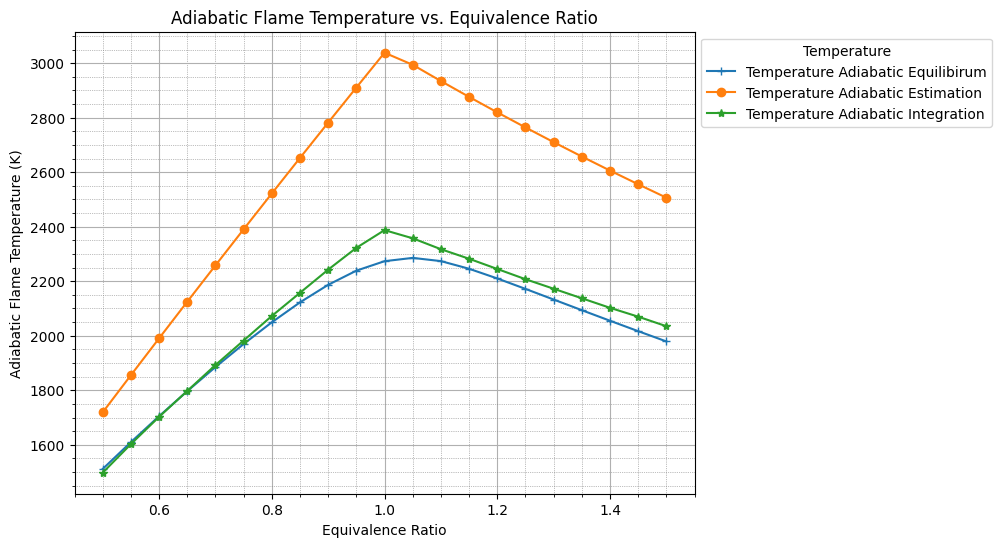

In [17]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(equivalence_ratios, adiabatic_flame_temperatures, marker='+', label = "Temperature Adiabatic Equilibirum")
plt.plot(equivalence_ratios, Temp_adiabatic_estimation, marker='o', label = "Temperature Adiabatic Estimation")
plt.plot(equivalence_ratios, Temp_adiabatic_integration, marker='*', label = "Temperature Adiabatic Integration")
plt.xlabel('Equivalence Ratio')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Adiabatic Flame Temperature vs. Equivalence Ratio')
plt.grid(True)
plt.legend(loc='upper left', title='Temperature', bbox_to_anchor=(1, 1))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

In [5]:
# Constants
R = 8314.4621  # J/kmol/K (universal gas constant)
Cp = 3.5 * R   # Constant heat capacity (J/kmol/K)

# Equivalence ratios to consider
equivalence_ratios = np.arange(0.5, 2.05, 0.05)
# Initialize variables to store results
#max_temperature = 0.0
#max_phi = 0.0

# Initialize an empty list to store results
adiabatic_flame_temperatures_H2 = []
#print(equivalence_ratios)

# Loop through each equivalence ratio

#Create a gas object using the Jerzembeck mechanism
gas = ct.Solution('Jerzembeck.yaml')

for phi in equivalence_ratios:
    
    # Set the equivalence ratio
    
    gas.TP = 300.0, ct.one_atm
    gas.set_equivalence_ratio(phi, 'H2', 'O2:0.5, N2:1.88')
    
    gas.equilibrate('HP')
    T_adiabatic = round(gas.T,2)
    #print(T_adiabatic)
    adiabatic_flame_temperatures_H2.append(T_adiabatic)
    print(f'Equivalence Ratio: {phi:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')

Equivalence Ratio: 0.50, Adiabatic Flame Temperature: 1643.19 K
Equivalence Ratio: 0.55, Adiabatic Flame Temperature: 1743.68 K
Equivalence Ratio: 0.60, Adiabatic Flame Temperature: 1839.25 K
Equivalence Ratio: 0.65, Adiabatic Flame Temperature: 1929.91 K
Equivalence Ratio: 0.70, Adiabatic Flame Temperature: 2015.57 K
Equivalence Ratio: 0.75, Adiabatic Flame Temperature: 2096.04 K
Equivalence Ratio: 0.80, Adiabatic Flame Temperature: 2170.91 K
Equivalence Ratio: 0.85, Adiabatic Flame Temperature: 2239.42 K
Equivalence Ratio: 0.90, Adiabatic Flame Temperature: 2300.10 K
Equivalence Ratio: 0.95, Adiabatic Flame Temperature: 2350.08 K
Equivalence Ratio: 1.00, Adiabatic Flame Temperature: 2384.58 K
Equivalence Ratio: 1.05, Adiabatic Flame Temperature: 2399.58 K
Equivalence Ratio: 1.10, Adiabatic Flame Temperature: 2397.66 K
Equivalence Ratio: 1.15, Adiabatic Flame Temperature: 2385.79 K
Equivalence Ratio: 1.20, Adiabatic Flame Temperature: 2369.09 K
Equivalence Ratio: 1.25, Adiabatic Flame

**Part V - Parameters affecting T_adiabatic**

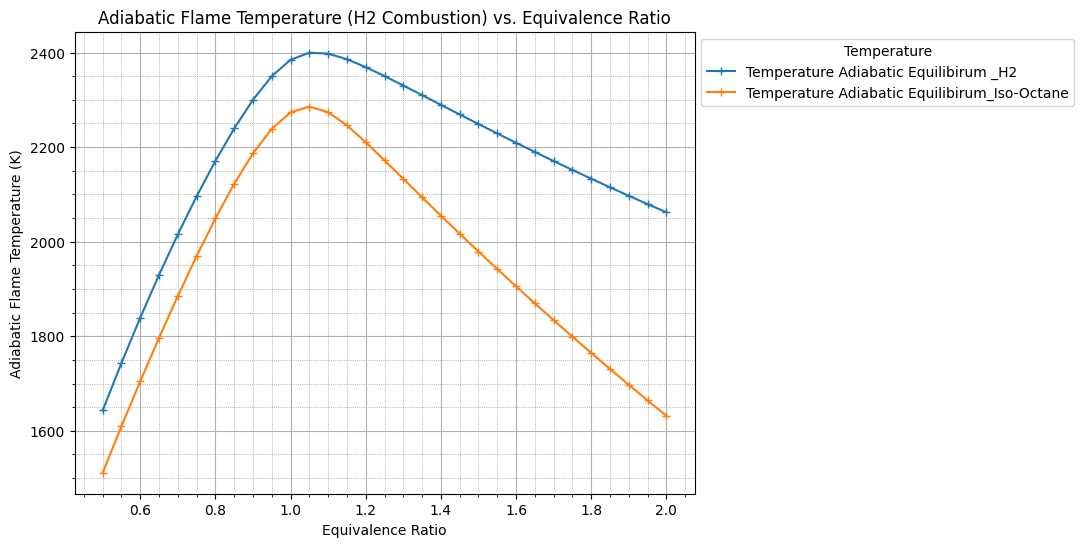

In [8]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(equivalence_ratios, adiabatic_flame_temperatures_H2, marker='+', label = "Temperature Adiabatic Equilibirum _H2")
plt.plot(equivalence_ratios, adiabatic_flame_temperatures, marker='+', label = "Temperature Adiabatic Equilibirum_Iso-Octane")
plt.xlabel('Equivalence Ratio')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Adiabatic Flame Temperature (H2 Combustion) vs. Equivalence Ratio')
plt.grid(True)
plt.legend(loc='upper left', title='Temperature', bbox_to_anchor=(1, 1))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

In [53]:
# Constants
R = 8.314  # KJ/kmol/K (universal gas constant)
Cp = 3.5 * R   # Constant heat capacity (J/kmol/K)

#VARIABLES DECALARATION
#-----------------------------------------------------------------------------
# Equivalence ratios to consider
equivalence_ratios = np.arange(0.5, 2.05, 0.05)

# Pressure variation to consider
pressure_variation = np.arange(1, 37, 5)

# temperature variation to consider
temp_variation = np.arange(300, 950, 100)

# species list to find composition at quilibrium
species_list = ["O","CO","CO2","H2","H2O","H","OH", "NO"]
Mol_weight_species = [16, 28, 44, 2, 18, 1, 17, 30]
#Mole_fractions_list = np.zeros(len(species_list))

# Temperature adiabatic at const P initial(Pin), and T initial(Tin)
T_adiabatic_const_Pin_Tin = np.zeros(len(equivalence_ratios))

# Temperature adiabatic at const Equivalence ratio(ER), and T initial(Tin)
T_adiabatic_const_ER_Tin = np.zeros(len(pressure_variation)) 

# Temperature adiabatic at const P initial(Pin), and Equivalence ratio(ER)
T_adiabatic_const_ER_Pin = np.zeros(len(temp_variation))

# species list to find composition at quilibrium, const P initial(Pin), and T initial(Tin)
#species_list_const_Pin_Tin = np.zeros(len(equivalence_ratios))
#Molefractions_const_Pin_Tin = []
species_list_const_Pin_Tin = []
# species list to find composition at quilibrium, const Equivalence ratio(ER), and T initial(Tin)
#species_list_const_ER_Tin = np.zeros(len(pressure_variation))
#Molefractions_const_ER_Tin = []
species_list_const_ER_Tin = []

# species list to find composition at quilibrium, const P initial(Pin), and Equivalence ratio(ER)
#species_list_const_ER_Pin  = np.zeros(len(temp_variation))
#Molefractions_const_ER_Pin = []
species_list_const_ER_Pin = []

# PART 1---------------------------------------------------------------------------------------------------
#Create a gas object using the Jerzembeck mechanism
gas = ct.Solution('Jerzembeck.yaml')


# Loop through different φ values
for index, phi in enumerate(equivalence_ratios):
    Molefractions_const_Pin_Tin = []
    # Define the initial state
    gas.TP = 800.0, 30*ct.one_atm
    gas.set_equivalence_ratio(phi, 'IXC8H18', 'O2:12.5, N2:0')
    
    gas.equilibrate('HP')
    T_adiabatic = round(gas.T,2)
    #print(T_adiabatic)
    T_adiabatic_const_Pin_Tin[index] = T_adiabatic
    print(f'Equivalence Ratio: {phi:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    
    for sp in species_list:
        mole_fractions = gas[sp].X
        #print(mole_fractions)
        Molefractions_const_Pin_Tin.append(mole_fractions[0])
    
    species_list_const_Pin_Tin.append(Molefractions_const_Pin_Tin)
    '''
    gas.TP = 300.0, ct.one_atm
    gas.set_equivalence_ratio(phi, 'IXC8H18', 'O2:1, N2:3.76')
    
    # Create a reactor and equilibrate it
    reactor = ct.IdealGasReactor(gas)
    #reactor = ct.IdealGasConstPressureReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    #reactor_network.advance_to_steady_state()
    try:
        # Initialize the reactor network
        reactor_network.advance_to_steady_state()
        
        # Get the adiabatic flame temperature
        T_adiabatic = round(reactor.T,2)

        # Append the result to the list
        T_adiabatic_const_Pin_Tin[index] = T_adiabatic
        
        print(f'Equivalence Ratio: {phi:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    except Exception as e:
        print(f'Error at Equivalence Ratio {phi:.2f}: {e}')
    
    
    # Calculate adiabatic flame temperature (Tad)
    T_adiabatic = round(reactor.T,2)
    print(phi)
    print(T_adiabatic)
    T_adiabatic_const_Pin_Tin[index] = T_adiabatic
    

    # Get the mole fractions of the specified species
    for sp in species_list:
        mole_fractions = reactor.thermo[sp].X
        #print(mole_fractions)
        Molefractions_const_Pin_Tin.append(mole_fractions[0])
        #species_list_const_Pin_Tin[index,:] = mole_fractions[0]
        #print(species_list_const_Pin_Tin)
    #mole_fractions = {sp: reactor.thermo[sp].X for sp in species_list}
    #print(mole_fractions)
    #species_list_const_Pin_Tin.append(mole_fractions)
    #species_list_const_Pin_Tin[index] = mole_fractions
    
    species_list_const_Pin_Tin.append(Molefractions_const_Pin_Tin)

#print(species_list_const_Pin_Tin)


  
# Print or analyze the results as needed
species_list_const_Pin_Tin = list(species_list_const_Pin_Tin)

for i, phi in enumerate(equivalence_ratios):
    print(f'Phi = {phi:.2f}, Tad = {T_adiabatic_const_Pin_Tin[i]:.2f} K')
    mole_fractions = species_list_const_Pin_Tin[i]
    for sp in species_list:
        mole_fraction = mole_fractions.get(sp, 0.0)  # Get the mole fraction with a default of 0.0
        print(f'{sp}: {mole_fraction:.6f}')
'''

Equivalence Ratio: 0.50, Adiabatic Flame Temperature: 3392.20 K
Equivalence Ratio: 0.55, Adiabatic Flame Temperature: 3447.82 K
Equivalence Ratio: 0.60, Adiabatic Flame Temperature: 3494.52 K
Equivalence Ratio: 0.65, Adiabatic Flame Temperature: 3534.06 K
Equivalence Ratio: 0.70, Adiabatic Flame Temperature: 3567.70 K
Equivalence Ratio: 0.75, Adiabatic Flame Temperature: 3596.34 K
Equivalence Ratio: 0.80, Adiabatic Flame Temperature: 3620.65 K
Equivalence Ratio: 0.85, Adiabatic Flame Temperature: 3641.13 K
Equivalence Ratio: 0.90, Adiabatic Flame Temperature: 3658.11 K
Equivalence Ratio: 0.95, Adiabatic Flame Temperature: 3671.87 K
Equivalence Ratio: 1.00, Adiabatic Flame Temperature: 3682.58 K
Equivalence Ratio: 1.05, Adiabatic Flame Temperature: 3690.33 K
Equivalence Ratio: 1.10, Adiabatic Flame Temperature: 3695.18 K
Equivalence Ratio: 1.15, Adiabatic Flame Temperature: 3697.12 K
Equivalence Ratio: 1.20, Adiabatic Flame Temperature: 3696.09 K
Equivalence Ratio: 1.25, Adiabatic Flame

[1.48499223e-06 4.83600835e-06 1.31273069e-05 3.06443405e-05
 6.28281683e-05 1.14559578e-04 1.86611908e-04 2.70497231e-04
 3.44102679e-04 3.73989807e-04 3.32367879e-04 2.29905786e-04
 1.25202643e-04 5.96986228e-05 2.74258326e-05 1.26093402e-05
 5.85317114e-06 2.74260936e-06 1.29395939e-06 6.12918210e-07
 2.90672609e-07 1.37665135e-07 6.49630610e-08 3.04810369e-08
 1.41935186e-08 6.54766630e-09 2.98748939e-09 1.34608254e-09
 5.98036170e-10 2.61595635e-10 1.12496608e-10]
[1.16519418e-06 5.27391749e-06 1.95903777e-05 6.21782161e-05
 1.73736398e-04 4.36867762e-04 1.00424507e-03 2.13300597e-03
 4.21579025e-03 7.79477365e-03 1.35352342e-02 2.20008463e-02
 3.29142743e-02 4.49078780e-02 5.67649620e-02 6.79592740e-02
 7.83459116e-02 8.79254813e-02 9.67518566e-02 1.04897152e-01
 1.12436849e-01 1.19442980e-01 1.25981134e-01 1.32109439e-01
 1.37878604e-01 1.43332489e-01 1.48508884e-01 1.53440351e-01
 1.58155025e-01 1.62677332e-01 1.67028630e-01]
[0.06477523 0.07098847 0.07714442 0.08322344 0.08918

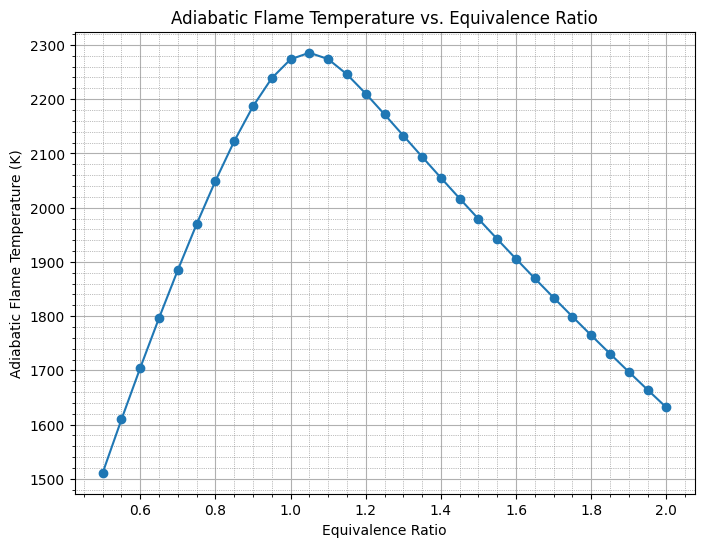

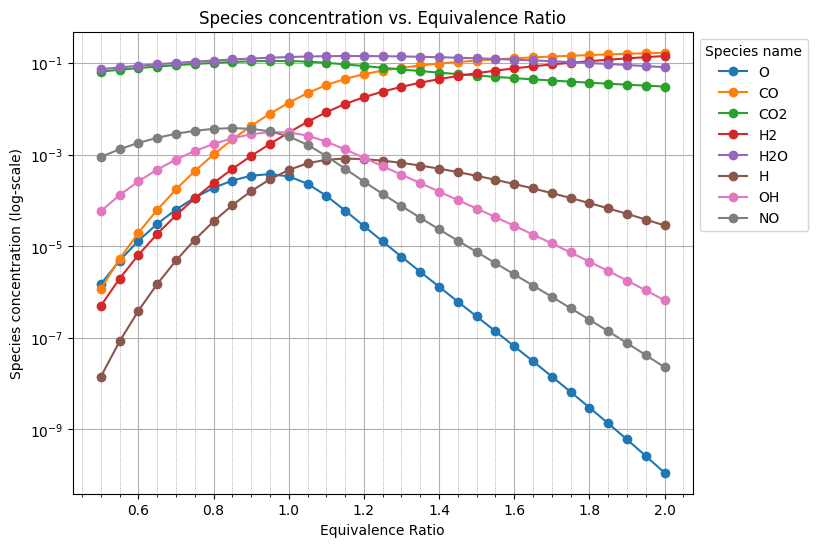

In [13]:
mole_faction_O = np.zeros(len(equivalence_ratios))
mole_faction_CO = np.zeros(len(equivalence_ratios))
mole_faction_CO2 = np.zeros(len(equivalence_ratios))
mole_faction_H2 = np.zeros(len(equivalence_ratios))
mole_faction_H2O = np.zeros(len(equivalence_ratios))
mole_faction_H = np.zeros(len(equivalence_ratios))
mole_faction_OH = np.zeros(len(equivalence_ratios))
mole_faction_NO = np.zeros(len(equivalence_ratios))

for i in range(0, len(equivalence_ratios)):
    '''
    mole_faction_O[i] = round(species_list_const_Pin_Tin[i][0],3)
    mole_faction_CO[i] = round(species_list_const_Pin_Tin[i][1],3)
    mole_faction_CO2[i] = round(species_list_const_Pin_Tin[i][2],3)
    mole_faction_H2[i] = round(species_list_const_Pin_Tin[i][3],3)
    mole_faction_H2O[i] = round(species_list_const_Pin_Tin[i][4],3)
    mole_faction_H[i] = round(species_list_const_Pin_Tin[i][5],3)
    mole_faction_OH[i] = round(species_list_const_Pin_Tin[i][6],3)
    mole_faction_NO[i] = round(species_list_const_Pin_Tin[i][7],3)
    '''
    mole_faction_O[i] = species_list_const_Pin_Tin[i][0]
    mole_faction_CO[i] = species_list_const_Pin_Tin[i][1]
    mole_faction_CO2[i] = species_list_const_Pin_Tin[i][2]
    mole_faction_H2[i] = species_list_const_Pin_Tin[i][3]
    mole_faction_H2O[i] = species_list_const_Pin_Tin[i][4]
    mole_faction_H[i] = species_list_const_Pin_Tin[i][5]
    mole_faction_OH[i] = species_list_const_Pin_Tin[i][6]
    mole_faction_NO[i] = species_list_const_Pin_Tin[i][7]
# Your data definition here...
print(mole_faction_O) 
print(mole_faction_CO) 
print(mole_faction_CO2)
print(mole_faction_H2)
print(mole_faction_H2O) 
print(mole_faction_H)
print(mole_faction_OH)
print(mole_faction_NO)
'''
data = {
    'Equivalence Ratio': equivalence_ratios,
    'T Adiabatic': T_adiabatic_const_Pin_Tin,
    'Mole Fraction O': mole_faction_O,
    'Mole Fraction CO': mole_faction_CO,
    'Mole Fraction CO2': mole_faction_CO2,
    'Mole Fraction H2': mole_faction_H2,
    'Mole Fraction H2O': mole_faction_H2O,
    'Mole Fraction H': mole_faction_H,
    'Mole Fraction OH': mole_faction_OH,
    'Mole Fraction NO': mole_faction_NO
}

df = pd.DataFrame(data)
# Copy to clipboard with tab as separator, including header but excluding index
df.to_clipboard(index=False, header=True, sep='\t')
'''

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(equivalence_ratios, T_adiabatic_const_Pin_Tin, marker='o')
plt.xlabel('Equivalence Ratio')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Adiabatic Flame Temperature vs. Equivalence Ratio')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

plt.figure(figsize=(8, 6))
plt.semilogy(equivalence_ratios, mole_faction_O, marker='o',label = 'O')
plt.semilogy(equivalence_ratios, mole_faction_CO, marker='o',label = 'CO')
plt.semilogy(equivalence_ratios, mole_faction_CO2, marker='o',label = 'CO2')
plt.semilogy(equivalence_ratios, mole_faction_H2, marker='o',label = 'H2')
plt.semilogy(equivalence_ratios, mole_faction_H2O, marker='o',label = 'H2O')
plt.semilogy(equivalence_ratios, mole_faction_H, marker='o',label = 'H')
plt.semilogy(equivalence_ratios, mole_faction_OH, marker='o',label = 'OH')
plt.semilogy(equivalence_ratios, mole_faction_NO, marker='o',label = 'NO')
plt.xlabel('Equivalence Ratio')
plt.ylabel('Species concentration (log-scale)')
plt.title('Species concentration vs. Equivalence Ratio')
plt.legend(loc='upper left', title='Species name', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()


In [29]:
# PART 2 ---------------------------------------------------------------------------------------------------
#Create a gas object using the Jerzembeck mechanism
gas = ct.Solution('Jerzembeck.yaml')


# Loop through different φ values
for index, p in enumerate(pressure_variation):
    Molefractions_const_ER_Tin = []
    # Define the initial state
    gas.TP = 300, p*ct.one_atm
    gas.X = 'IXC8H18:1, O2:12.5, N2:47'
    
    gas.equilibrate('HP')
    T_adiabatic = round(gas.T,2)
    #print(T_adiabatic)
    T_adiabatic_const_ER_Tin[index] = T_adiabatic
    print(f'Pressure: {p:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    
    for sp in species_list:
        mole_fractions = gas[sp].X
        #print(mole_fractions)
        Molefractions_const_ER_Tin.append(mole_fractions[0])
    
    species_list_const_ER_Tin.append(Molefractions_const_ER_Tin)
    '''
    gas.TP = 300, p*ct.one_atm
    gas.X = 'IXC8H18:1, O2:12.5, N2:47'
    
    # Create a reactor and equilibrate it
    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    #reactor_network.advance_to_steady_state()
    try:
        # Initialize the reactor network
        reactor_network.advance_to_steady_state()
        
        # Get the adiabatic flame temperature
        T_adiabatic = round(reactor.T,2)

        # Append the result to the list
        T_adiabatic_const_ER_Tin[index] = T_adiabatic
        
        print(f'Pressure: {p:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    except Exception as e:
        print(f'Error at Pressure {p:.2f}: {e}')
    
    
    # Calculate adiabatic flame temperature (Tad)
    T_adiabatic = round(reactor.T,2)
    print(phi)
    print(T_adiabatic)
    T_adiabatic_const_Pin_Tin[index] = T_adiabatic
    

    # Get the mole fractions of the specified species
    # Get the mole fractions of the specified species
    for sp in species_list:
        mole_fractions = reactor.thermo[sp].X
        #print(mole_fractions)
        Molefractions_const_ER_Tin.append(mole_fractions[0])
        #species_list_const_Pin_Tin[index,:] = mole_fractions[0]
        #print(species_list_const_Pin_Tin)
    #mole_fractions = {sp: reactor.thermo[sp].X for sp in species_list}
    #print(mole_fractions)
    #species_list_const_Pin_Tin.append(mole_fractions)
    #species_list_const_Pin_Tin[index] = mole_fractions
    
    species_list_const_ER_Tin.append(Molefractions_const_ER_Tin)

print(species_list_const_ER_Tin)
'''

Pressure: 1.00, Adiabatic Flame Temperature: 2271.47 K
Pressure: 6.00, Adiabatic Flame Temperature: 2314.75 K
Pressure: 11.00, Adiabatic Flame Temperature: 2326.76 K
Pressure: 16.00, Adiabatic Flame Temperature: 2333.52 K
Pressure: 21.00, Adiabatic Flame Temperature: 2338.12 K
Pressure: 26.00, Adiabatic Flame Temperature: 2341.57 K
Pressure: 31.00, Adiabatic Flame Temperature: 2344.30 K
Pressure: 36.00, Adiabatic Flame Temperature: 2346.54 K


[3.44091496e-04 1.44927125e-04 1.05525376e-04 8.62707377e-05
 7.43397253e-05 6.60373036e-05 5.98416793e-05 5.49960032e-05]
[0.01373438 0.00948732 0.0082651  0.00756921 0.00709195 0.00673334
 0.00644862 0.00621404]
[0.11005236 0.11470065 0.1160335  0.11679154 0.11731107 0.11770126
 0.11801095 0.11826604]
[0.00307422 0.0020209  0.00173647 0.00157798 0.00147069 0.00139082
 0.00132785 0.00127626]
[0.13440292 0.13654635 0.1371252  0.13744785 0.13766631 0.13782896
 0.1379572  0.13806226]
[4.77827877e-04 1.97096280e-04 1.43205033e-04 1.17069951e-04
 1.00937814e-04 8.97379344e-05 8.13927051e-05 7.48724894e-05]
[0.00308737 0.00209036 0.0018042  0.00164175 0.00153059 0.00144724
 0.00138118 0.00132684]
[0.0024869  0.00219616 0.00207612 0.00199866 0.00194124 0.00189562
 0.00185777 0.00182545]


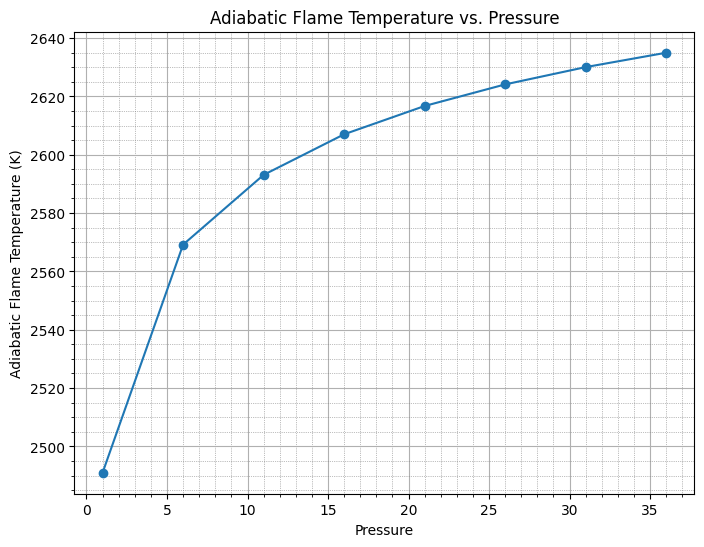

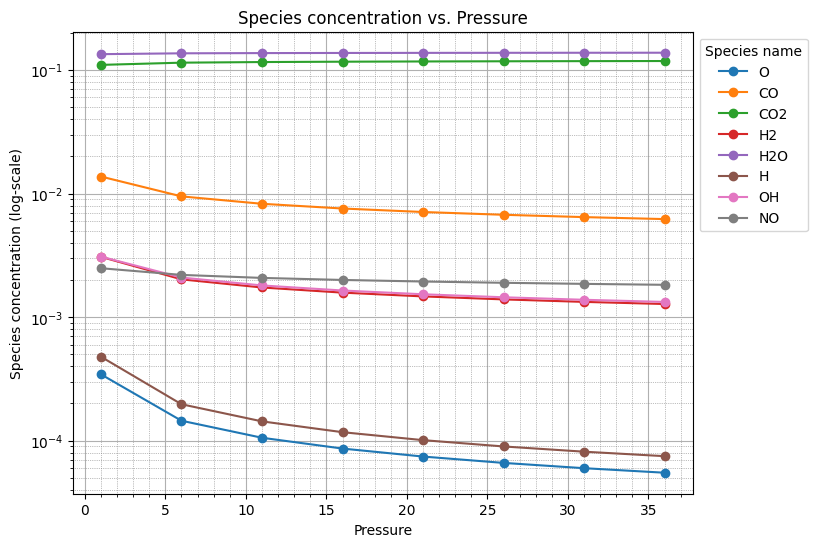

In [23]:
mole_faction_O = np.zeros(len(pressure_variation))
mole_faction_CO = np.zeros(len(pressure_variation))
mole_faction_CO2 = np.zeros(len(pressure_variation))
mole_faction_H2 = np.zeros(len(pressure_variation))
mole_faction_H2O = np.zeros(len(pressure_variation))
mole_faction_H = np.zeros(len(pressure_variation))
mole_faction_OH = np.zeros(len(pressure_variation))
mole_faction_NO = np.zeros(len(pressure_variation))

#print(len(pressure_variation))

#print(len(species_list_const_ER_Tin))
for i in range(0, len(pressure_variation)):
    #print(i)
    mole_faction_O[i] = species_list_const_ER_Tin[i][0]
    mole_faction_CO[i] = species_list_const_ER_Tin[i][1]
    mole_faction_CO2[i] = species_list_const_ER_Tin[i][2]
    mole_faction_H2[i] = species_list_const_ER_Tin[i][3]
    mole_faction_H2O[i] = species_list_const_ER_Tin[i][4]
    mole_faction_H[i] = species_list_const_ER_Tin[i][5]
    mole_faction_OH[i] = species_list_const_ER_Tin[i][6]
    mole_faction_NO[i] = species_list_const_ER_Tin[i][7]

print(mole_faction_O) 
print(mole_faction_CO) 
print(mole_faction_CO2)
print(mole_faction_H2)
print(mole_faction_H2O) 
print(mole_faction_H)
print(mole_faction_OH)
print(mole_faction_NO)
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(pressure_variation, T_adiabatic_const_ER_Tin, marker='o')
plt.xlabel('Pressure')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Adiabatic Flame Temperature vs. Pressure')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

plt.figure(figsize=(8, 6))
plt.semilogy(pressure_variation, mole_faction_O, marker='o',label = 'O')
plt.semilogy(pressure_variation, mole_faction_CO, marker='o',label = 'CO')
plt.semilogy(pressure_variation, mole_faction_CO2, marker='o',label = 'CO2')
plt.semilogy(pressure_variation, mole_faction_H2, marker='o',label = 'H2')
plt.semilogy(pressure_variation, mole_faction_H2O, marker='o',label = 'H2O')
plt.semilogy(pressure_variation, mole_faction_H, marker='o',label = 'H')
plt.semilogy(pressure_variation, mole_faction_OH, marker='o',label = 'OH')
plt.semilogy(pressure_variation, mole_faction_NO, marker='o',label = 'NO')
plt.xlabel('Pressure')
plt.ylabel('Species concentration (log-scale)')
plt.title('Species concentration vs. Pressure')
plt.legend(loc='upper left', title='Species name', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()


In [17]:
# PART 3 -- CONSTANT EQUIVALENCE RATIO & PRESSURE 
#---------------------------------------------------------------------------------------------------
#Create a gas object using the Jerzembeck mechanism
gas = ct.Solution('Jerzembeck.yaml')


# Loop through different φ values
for index, t in enumerate(temp_variation):
    Molefractions_const_ER_Pin = []
    # Define the initial state
    gas.TP = t, ct.one_atm
    gas.X = 'IXC8H18:1, O2:12.5, N2:47'
    
    gas.equilibrate('HP')
    T_adiabatic = round(gas.T,2)
    #print(T_adiabatic)
    T_adiabatic_const_ER_Pin[index] = T_adiabatic
    print(f'Temperature: {t:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    
    for sp in species_list:
        mole_fractions = gas[sp].X
        #print(mole_fractions)
        Molefractions_const_ER_Pin.append(mole_fractions[0])
    
    species_list_const_ER_Pin.append(Molefractions_const_ER_Pin)
    '''
    gas.TP = t, ct.one_atm
    gas.X = 'IXC8H18:1, O2:12.5, N2:47'
    # Create a reactor and equilibrate it
    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    #reactor_network.advance_to_steady_state()
    try:
        # Initialize the reactor network
        reactor_network.advance_to_steady_state()
        
        # Get the adiabatic flame temperature
        T_adiabatic = round(reactor.T,2)

        # Append the result to the list
        T_adiabatic_const_ER_Pin[index] = T_adiabatic
        
        print(f'Temperature: {t:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    except Exception as e:
        print(f'Error at Temperature {t:.2f}: {e}')
    
    
    # Calculate adiabatic flame temperature (Tad)
    T_adiabatic = round(reactor.T,2)
    print(phi)
    print(T_adiabatic)
    T_adiabatic_const_Pin_Tin[index] = T_adiabatic
    

    # Get the mole fractions of the specified species
    # Get the mole fractions of the specified species
    for sp in species_list:
        mole_fractions = reactor.thermo[sp].X
        #print(mole_fractions)
        Molefractions_const_ER_Pin.append(mole_fractions[0])
        #species_list_const_Pin_Tin[index,:] = mole_fractions[0]
        #print(species_list_const_Pin_Tin)
    #mole_fractions = {sp: reactor.thermo[sp].X for sp in species_list}
    #print(mole_fractions)
    #species_list_const_Pin_Tin.append(mole_fractions)
    #species_list_const_Pin_Tin[index] = mole_fractions
    
    species_list_const_ER_Pin.append(Molefractions_const_ER_Pin)

print(species_list_const_ER_Pin)
'''

Temperature: 300.00, Adiabatic Flame Temperature: 2271.47 K
Temperature: 400.00, Adiabatic Flame Temperature: 2317.41 K
Temperature: 500.00, Adiabatic Flame Temperature: 2362.18 K
Temperature: 600.00, Adiabatic Flame Temperature: 2406.03 K
Temperature: 700.00, Adiabatic Flame Temperature: 2448.99 K
Temperature: 800.00, Adiabatic Flame Temperature: 2491.06 K
Temperature: 900.00, Adiabatic Flame Temperature: 2532.23 K


[0.00034409 0.0004864  0.00067711 0.00092369 0.00123648 0.00162645
 0.00210446]
[0.01373438 0.01635938 0.01927815 0.02243101 0.02578951 0.02932094
 0.03298532]
[0.11005236 0.107181   0.10398128 0.1005162  0.0968143  0.09290856
 0.08883987]
[0.00307422 0.00363066 0.00425995 0.00495337 0.00571108 0.00653273
 0.0074164 ]
[0.13440292 0.13312932 0.13166119 0.13001107 0.12817335 0.12614354
 0.12392081]
[0.00047783 0.00065595 0.00089009 0.00118757 0.00155977 0.00201905
 0.00257804]
[0.00308737 0.0037891  0.00460023 0.00551341 0.00652825 0.00764273
 0.00885178]
[0.0024869  0.00297112 0.00350981 0.00409874 0.00473515 0.0054156
 0.00613528]


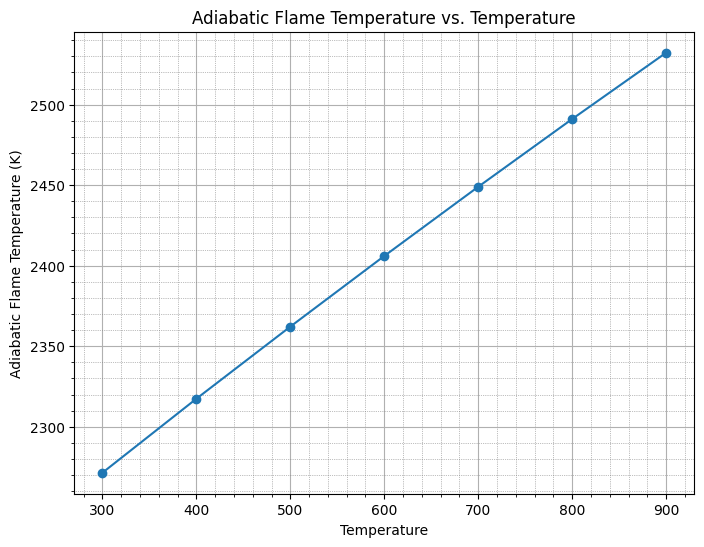

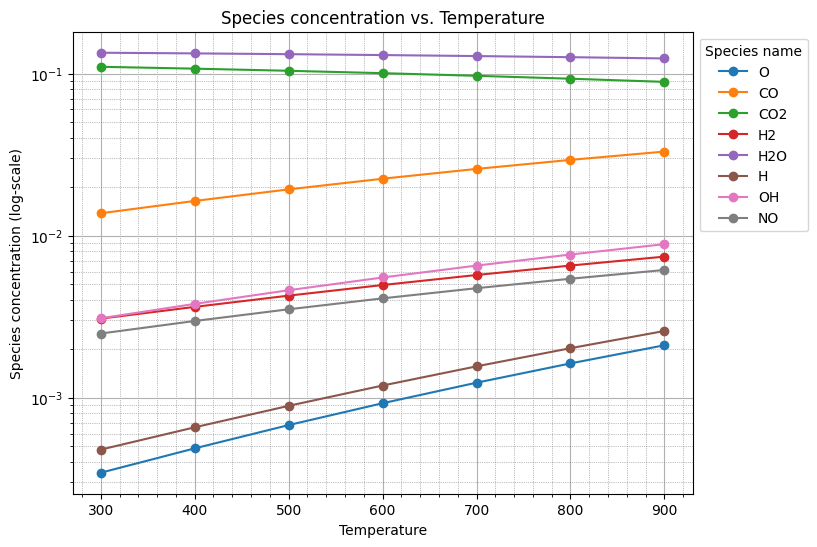

In [18]:
mole_faction_O = np.zeros(len(temp_variation))
mole_faction_CO = np.zeros(len(temp_variation))
mole_faction_CO2 = np.zeros(len(temp_variation))
mole_faction_H2 = np.zeros(len(temp_variation))
mole_faction_H2O = np.zeros(len(temp_variation))
mole_faction_H = np.zeros(len(temp_variation))
mole_faction_OH = np.zeros(len(temp_variation))
mole_faction_NO = np.zeros(len(temp_variation))

#print(len(pressure_variation))

#print(len(species_list_const_ER_Tin))
for i in range(0, len(temp_variation)):
    #print(i)
    mole_faction_O[i] = species_list_const_ER_Pin[i][0]
    mole_faction_CO[i] = species_list_const_ER_Pin[i][1]
    mole_faction_CO2[i] = species_list_const_ER_Pin[i][2]
    mole_faction_H2[i] = species_list_const_ER_Pin[i][3]
    mole_faction_H2O[i] = species_list_const_ER_Pin[i][4]
    mole_faction_H[i] = species_list_const_ER_Pin[i][5]
    mole_faction_OH[i] = species_list_const_ER_Pin[i][6]
    mole_faction_NO[i] = species_list_const_ER_Pin[i][7]

print(mole_faction_O) 
print(mole_faction_CO) 
print(mole_faction_CO2)
print(mole_faction_H2)
print(mole_faction_H2O) 
print(mole_faction_H)
print(mole_faction_OH)
print(mole_faction_NO)
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(temp_variation, T_adiabatic_const_ER_Pin, marker='o')
plt.xlabel('Temperature')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Adiabatic Flame Temperature vs. Temperature')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

plt.figure(figsize=(8, 6))
plt.semilogy(temp_variation, mole_faction_O, marker='o',label = 'O')
plt.semilogy(temp_variation, mole_faction_CO, marker='o',label = 'CO')
plt.semilogy(temp_variation, mole_faction_CO2, marker='o',label = 'CO2')
plt.semilogy(temp_variation, mole_faction_H2, marker='o',label = 'H2')
plt.semilogy(temp_variation, mole_faction_H2O, marker='o',label = 'H2O')
plt.semilogy(temp_variation, mole_faction_H, marker='o',label = 'H')
plt.semilogy(temp_variation, mole_faction_OH, marker='o',label = 'OH')
plt.semilogy(temp_variation, mole_faction_NO, marker='o',label = 'NO')
plt.xlabel('Temperature')
plt.ylabel('Species concentration (log-scale)')
plt.title('Species concentration vs. Temperature')
plt.legend(loc='upper left', title='Species name', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

**Part VI - - Effect of dilution on Tad -Exhaust Gas Recirculation (EGR)**

In [42]:
# CO2 GAS RECIRCULATION
phi = 0.9        # Equivalence ratio
P_in = 30    # Initial pressure in Pa (30 atm)
T_in = 800.0     # Initial temperature in K
species_names = ['IXC8H18', 'CO2', 'O2', 'N2']     #species for combustion
mole_fractions = {'IXC8H18':0.9,'CO2': 0.0, 'O2': 12.5, 'N2': 47}    

# species list to find composition at quilibrium
species_list = ["NO","NO2","CO","CO2"]
Mol_weight_species = [30, 46, 28, 44]


CO2_range = np.arange(0, 1, 0.05)
mole_fraction_NO = np.zeros(len(CO2_range))
mole_fraction_NO2 = np.zeros(len(CO2_range))
mole_fraction_CO = np.zeros(len(CO2_range))
mole_fraction_CO2 = np.zeros(len(CO2_range))
T_adiabatic_EGR_CO2 = np.zeros(len(CO2_range))
species_list_CO2_variation = []

#Create a gas object using the Jerzembeck mechanism
gas = ct.Solution('Jerzembeck.yaml')

for index, CO2_fraction in enumerate(CO2_range):
    Molefractions_CO2_variation = []
    
    #total_moles = (phi*(1-CO2_fraction)) + (CO2_fraction*(phi+12.5)) + (12.5*(1-CO2_fraction))
    #print(total_moles)
    #mole_fractions['IXC8H18'] = ((phi*(1-CO2_fraction))/total_moles)
    #print(mole_fractions['IXC8H18'])
    mole_fractions['CO2'] = ((CO2_fraction*(phi + 12.5))/(1-CO2_fraction))
    print(mole_fractions['CO2'])
    #mole_fractions['O2'] = 0.5 * phi * (12.5 / 1.0) * (1.0 - CO2_fraction)
    #mole_fractions['N2'] = 0.5 * phi * (12.5 / 3.76) * (1.0 - CO2_fraction)
    #mole_fractions['O2'] = (1/4.76)*((12.5*(1-CO2_fraction))/total_moles)
    #mole_fractions['N2'] = (3.76/4.76)*((12.5*(1-CO2_fraction))/total_moles)
    
    gas.TPX = T_in, ct.one_atm*P_in, mole_fractions
    gas.equilibrate('HP')
    T_adiabatic = round(gas.T,2)
    T_adiabatic_EGR_CO2[index] = T_adiabatic
    print(f'CO2_fraction: {CO2_fraction:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    '''
    #atol_temperature = 1e-1  # absolute tolerance for temperature
    reactor = ct.IdealGasReactor(gas)
    #reactor.set_atol(atol_temperature)
    reactor_network = ct.ReactorNet([reactor])
    #max_steps = 10000  # Increase as needed
    #reactor_network.set_max_num_steps(max_steps)

    try:
        # Initialize the reactor network
        reactor_network.advance_to_steady_state(max_steps=10000, residual_threshold=1e-4)
        
        # Get the adiabatic flame temperature
        T_adiabatic = round(reactor.T,2)

        # Append the result to the list
        T_adiabatic_EGR_CO2[index] = T_adiabatic
        #print(T_adiabatic)
        print(f'CO2_fraction: {CO2_fraction:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    except Exception as e:
        print(f'Error at CO2_fraction {CO2_fraction:.2f}: {e}')
    '''
    for sp in species_list:
        # extracting the mole fraction from reactor  
        mole_fractions_species = gas[sp].X
        # storing the list of mole fractions of each species in a list
        Molefractions_CO2_variation.append(mole_fractions_species[0])
    
    # making a list of list containing the mole fractions of required species
    species_list_CO2_variation.append(Molefractions_CO2_variation)

print(species_list_CO2_variation)

0.0
CO2_fraction: 0.00, Adiabatic Flame Temperature: 2548.79 K
0.7052631578947369
CO2_fraction: 0.05, Adiabatic Flame Temperature: 2525.58 K
1.488888888888889
CO2_fraction: 0.10, Adiabatic Flame Temperature: 2500.66 K
2.3647058823529417
CO2_fraction: 0.15, Adiabatic Flame Temperature: 2473.78 K
3.35
CO2_fraction: 0.20, Adiabatic Flame Temperature: 2444.65 K
4.466666666666667
CO2_fraction: 0.25, Adiabatic Flame Temperature: 2412.91 K
5.742857142857144
CO2_fraction: 0.30, Adiabatic Flame Temperature: 2378.11 K
7.215384615384617
CO2_fraction: 0.35, Adiabatic Flame Temperature: 2339.72 K
8.933333333333334
CO2_fraction: 0.40, Adiabatic Flame Temperature: 2297.07 K
10.963636363636363
CO2_fraction: 0.45, Adiabatic Flame Temperature: 2249.34 K
13.4
CO2_fraction: 0.50, Adiabatic Flame Temperature: 2195.51 K
16.37777777777778
CO2_fraction: 0.55, Adiabatic Flame Temperature: 2134.32 K
20.10000000000001
CO2_fraction: 0.60, Adiabatic Flame Temperature: 2064.24 K
24.88571428571429
CO2_fraction: 0.65

[7.25041063e-03 6.91301232e-03 6.55683811e-03 6.18125583e-03
 5.78579560e-03 5.37024236e-03 4.93476535e-03 4.48009700e-03
 4.00777693e-03 3.52047889e-03 3.02243823e-03 2.51999167e-03
 2.02222263e-03 1.54165409e-03 1.09479679e-03 7.02040607e-04
 3.85783833e-04 1.65021824e-04 4.49307584e-05 4.58404404e-06]
[1.01136197e-05 9.84488845e-06 9.54530586e-06 9.21291717e-06
 8.84582970e-06 8.44230106e-06 8.00085674e-06 7.52043818e-06
 7.00057444e-06 6.44155576e-06 5.84456689e-06 5.21172609e-06
 4.54602355e-06 3.85136672e-06 3.13342932e-06 2.40261932e-06
 1.68043629e-06 1.00854995e-06 4.55345422e-07 1.05737469e-07]
[6.63730697e-03 6.45846912e-03 6.21870203e-03 5.91578567e-03
 5.54847019e-03 5.11703157e-03 4.62403500e-03 4.07534425e-03
 3.48137614e-03 2.85849235e-03 2.23018876e-03 1.62733056e-03
 1.08614152e-03 6.42404989e-04 3.21409182e-04 1.26654149e-04
 3.49408802e-05 5.45060126e-06 3.10846045e-07 2.28435520e-09]
[0.10605436 0.11594789 0.12674124 0.13854981 0.15150912 0.16577941
 0.18155156 0.1

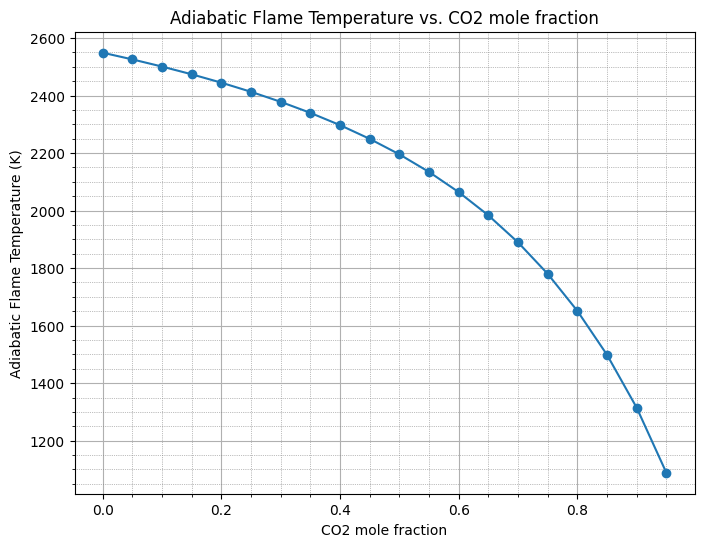

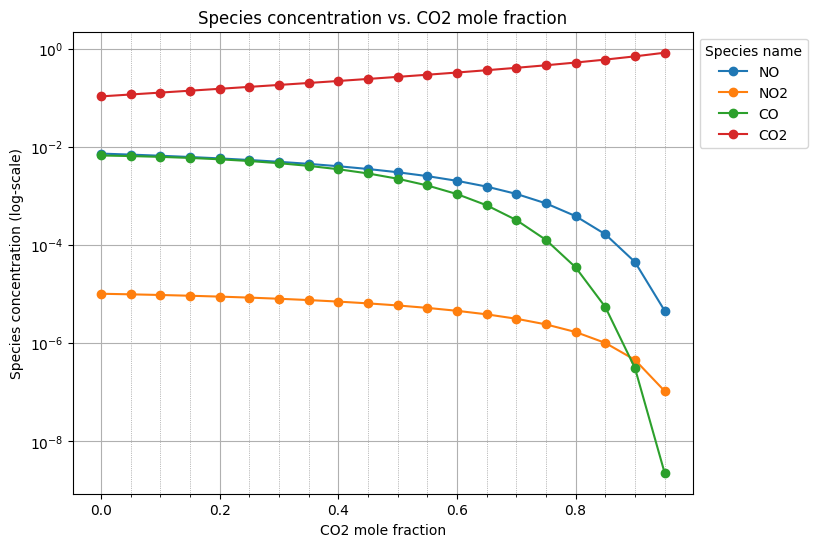

In [40]:
mole_faction_NO = np.zeros(len(CO2_range))
mole_faction_NO2 = np.zeros(len(CO2_range))
mole_faction_CO = np.zeros(len(CO2_range))
mole_faction_CO2 = np.zeros(len(CO2_range))

#print(len(pressure_variation))

#print(len(species_list_const_ER_Tin))
for i in range(0, len(CO2_range)):
    #print(i)
    mole_faction_NO[i] = species_list_CO2_variation[i][0]
    mole_faction_NO2[i] = species_list_CO2_variation[i][1]
    mole_faction_CO[i] = species_list_CO2_variation[i][2]
    mole_faction_CO2[i] = species_list_CO2_variation[i][3]

print(mole_faction_NO) 
print(mole_faction_NO2) 
print(mole_faction_CO)
print(mole_faction_CO2)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(CO2_range, T_adiabatic_EGR_CO2, marker='o')
plt.xlabel('CO2 mole fraction')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Adiabatic Flame Temperature vs. CO2 mole fraction')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

plt.figure(figsize=(8, 6))
plt.semilogy(CO2_range, mole_faction_NO, marker='o',label = 'NO')
plt.semilogy(CO2_range, mole_faction_NO2, marker='o',label = 'NO2')
plt.semilogy(CO2_range, mole_faction_CO, marker='o',label = 'CO')
plt.semilogy(CO2_range, mole_faction_CO2, marker='o',label = 'CO2')

plt.xlabel('CO2 mole fraction')
plt.ylabel('Species concentration (log-scale)')
plt.title('Species concentration vs. CO2 mole fraction')
plt.legend(loc='upper left', title='Species name', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

In [51]:
# H2O GAS RECIRCULATION
phi = 0.9        # Equivalence ratio
P_in = 30    # Initial pressure in Pa (30 atm)
T_in = 800.0     # Initial temperature in K
species_names = ['IXC8H18', 'H2O', 'O2', 'N2']     #species for combustion
mole_fractions = {'IXC8H18':0.9,'H2O': 0.0, 'O2': 12.5, 'N2': 47}   

# species list to find composition at quilibrium
species_list = ["NO","NO2","CO","CO2"]
Mol_weight_species = [30, 46, 28, 44]

# Defining the variables
H2O_range = np.arange(0, 1, 0.05)
mole_fraction_NO = np.zeros(len(H2O_range))
mole_fraction_NO2 = np.zeros(len(H2O_range))
mole_fraction_CO = np.zeros(len(H2O_range))
mole_fraction_CO2 = np.zeros(len(H2O_range))
T_adiabatic_EGR_H2O = np.zeros(len(H2O_range))

species_list_H2O_variation = []


#Create a gas object using the Jerzembeck mechanism
gas = ct.Solution('Jerzembeck.yaml')

for index, H2O_fraction in enumerate(H2O_range):
    
    #total_moles = (phi*(1-CO2_fraction)) + (CO2_fraction*(phi+12.5)) + (12.5*(1-CO2_fraction))
    #print(total_moles)
    #mole_fractions['IXC8H18'] = ((phi*(1-CO2_fraction))/total_moles)
    #print(mole_fractions['IXC8H18'])
    mole_fractions['H2O'] = ((H2O_fraction*(phi + 12.5))/(1-H2O_fraction))
    #mole_fractions['O2'] = 0.5 * phi * (12.5 / 1.0) * (1.0 - CO2_fraction)
    #mole_fractions['N2'] = 0.5 * phi * (12.5 / 3.76) * (1.0 - CO2_fraction)
    #mole_fractions['O2'] = (1/4.76)*((12.5*(1-CO2_fraction))/total_moles)
    #mole_fractions['N2'] = (3.76/4.76)*((12.5*(1-CO2_fraction))/total_moles)
    
    Molefractions_H2O_variation = []
    
    gas.TPX = T_in, P_in*ct.one_atm, mole_fractions
    gas.equilibrate('HP')
    T_adiabatic = round(gas.T,2)
    T_adiabatic_EGR_H2O[index] = T_adiabatic
    print(f'H2O_fraction: {H2O_fraction:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    '''
    #atol_temperature = 1e-1  # absolute tolerance for temperature
    reactor = ct.IdealGasReactor(gas)
    #reactor.set_atol(atol_temperature)
    reactor_network = ct.ReactorNet([reactor])
    #max_steps = 10000  # Increase as needed
    #reactor_network.set_max_num_steps(max_steps)

    try:
        # Initialize the reactor network
        reactor_network.advance_to_steady_state(max_steps=10000, residual_threshold=1e-4)
        
        # Get the adiabatic flame temperature
        T_adiabatic = round(reactor.T,2)

        # Append the result to the list
        T_adiabatic_EGR_H2O[index] = T_adiabatic
        #print(T_adiabatic)
        print(f'H2O_fraction: {H2O_fraction:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    except Exception as e:
        print(f'Error at H2O_fraction {H2O_fraction:.2f}: {e}')
    '''  
    for sp in species_list:
        # extracting the mole fraction from reactor  
        mole_fraction_species = gas[sp].X
        # storing the list of mole fractions of each species in a list
        Molefractions_H2O_variation.append(mole_fraction_species[0])

        # making a list of list containing the mole fractions of required species
    species_list_H2O_variation.append(Molefractions_H2O_variation)

print(species_list_H2O_variation)



H2O_fraction: 0.00, Adiabatic Flame Temperature: 2548.79 K
H2O_fraction: 0.05, Adiabatic Flame Temperature: 2531.01 K
H2O_fraction: 0.10, Adiabatic Flame Temperature: 2511.63 K
H2O_fraction: 0.15, Adiabatic Flame Temperature: 2490.39 K
H2O_fraction: 0.20, Adiabatic Flame Temperature: 2467.02 K
H2O_fraction: 0.25, Adiabatic Flame Temperature: 2441.19 K
H2O_fraction: 0.30, Adiabatic Flame Temperature: 2412.46 K
H2O_fraction: 0.35, Adiabatic Flame Temperature: 2380.35 K
H2O_fraction: 0.40, Adiabatic Flame Temperature: 2344.22 K
H2O_fraction: 0.45, Adiabatic Flame Temperature: 2303.31 K
H2O_fraction: 0.50, Adiabatic Flame Temperature: 2256.65 K
H2O_fraction: 0.55, Adiabatic Flame Temperature: 2203.04 K
H2O_fraction: 0.60, Adiabatic Flame Temperature: 2140.95 K
H2O_fraction: 0.65, Adiabatic Flame Temperature: 2068.43 K
H2O_fraction: 0.70, Adiabatic Flame Temperature: 1982.91 K
H2O_fraction: 0.75, Adiabatic Flame Temperature: 1880.94 K
H2O_fraction: 0.80, Adiabatic Flame Temperature: 1757.68

[7.25041063e-03 6.94108936e-03 6.61648001e-03 6.27565678e-03
 5.91771160e-03 5.54179651e-03 5.14718793e-03 4.73338377e-03
 4.30024943e-03 3.84823814e-03 3.37872418e-03 2.89450730e-03
 2.40056867e-03 1.90516913e-03 1.42132893e-03 9.68492359e-04
 5.73505011e-04 2.68497972e-04 8.06889082e-05 8.58801379e-06]
[1.01136197e-05 9.77831314e-06 9.42684826e-06 9.05811234e-06
 8.67091481e-06 8.26397370e-06 7.83589210e-06 7.38511836e-06
 6.90988157e-06 6.40809533e-06 5.87723321e-06 5.31421399e-06
 4.71542030e-06 4.07715172e-06 3.39711970e-06 2.67801347e-06
 1.93452193e-06 1.20488875e-06 5.65263373e-07 1.33198574e-07]
[6.63730697e-03 6.07162827e-03 5.49779497e-03 4.91866487e-03
 4.33803312e-03 3.76083089e-03 3.19332728e-03 2.64329973e-03
 2.12010833e-03 1.63456754e-03 1.19845759e-03 8.23482359e-04
 5.19512276e-04 2.92144692e-04 1.40061453e-04 5.33271743e-05
 1.42746985e-05 2.13081389e-06 1.06615887e-07 4.36646548e-10]
[0.10605436 0.10542065 0.10468985 0.10384464 0.10286399 0.10172233
 0.10038844 0.0

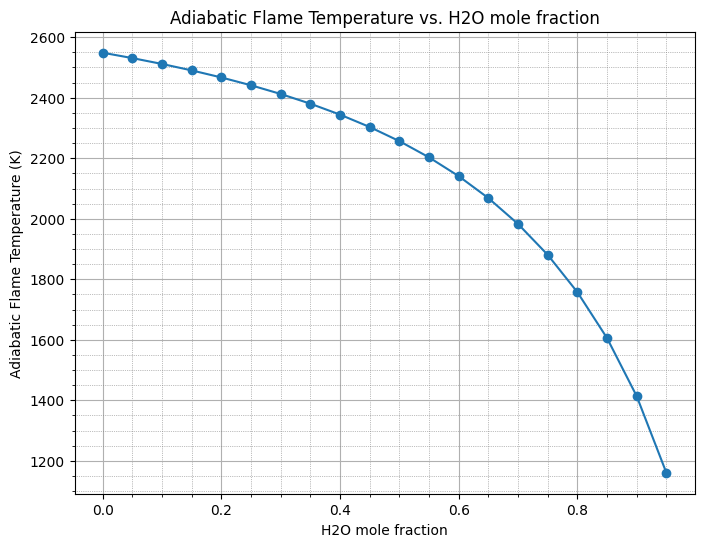

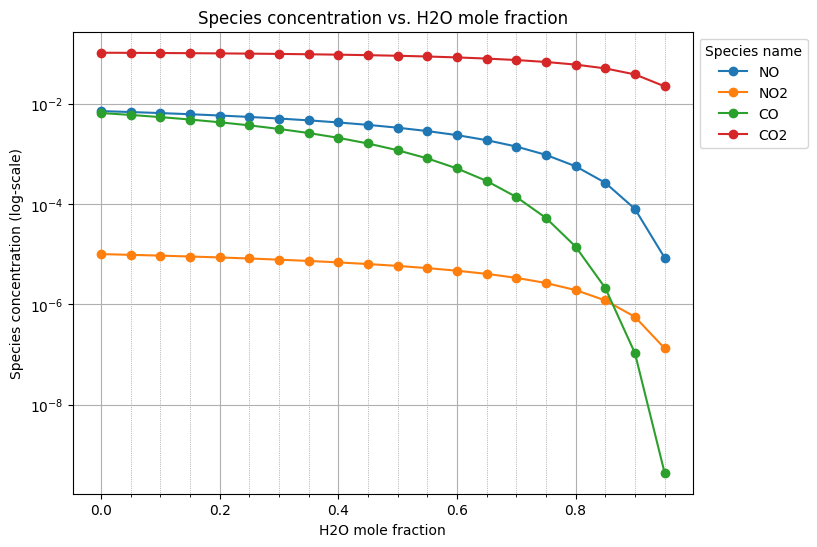

In [60]:
mole_faction_NO = np.zeros(len(H2O_range))
mole_faction_NO2 = np.zeros(len(H2O_range))
mole_faction_CO = np.zeros(len(H2O_range))
mole_faction_CO2 = np.zeros(len(H2O_range))

#print(len(pressure_variation))

#print(len(species_list_const_ER_Tin))
for i in range(0, len(H2O_range)):
    #print(i)
    mole_faction_NO[i] = species_list_H2O_variation[i][0]
    mole_faction_NO2[i] = species_list_H2O_variation[i][1]
    mole_faction_CO[i] = species_list_H2O_variation[i][2]
    mole_faction_CO2[i] = species_list_H2O_variation[i][3]

print(mole_faction_NO) 
print(mole_faction_NO2) 
print(mole_faction_CO)
print(mole_faction_CO2)
print(T_adiabatic_EGR_H2O)
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(H2O_range, T_adiabatic_EGR_H2O, marker='o')
plt.xlabel('H2O mole fraction')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Adiabatic Flame Temperature vs. H2O mole fraction')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

plt.figure(figsize=(8, 6))
plt.semilogy(H2O_range, mole_faction_NO, marker='o',label = 'NO')
plt.semilogy(H2O_range, mole_faction_NO2, marker='o',label = 'NO2')
plt.semilogy(H2O_range, mole_faction_CO, marker='o',label = 'CO')
plt.semilogy(H2O_range, mole_faction_CO2, marker='o',label = 'CO2')

plt.xlabel('H2O mole fraction')
plt.ylabel('Species concentration (log-scale)')
plt.title('Species concentration vs. H2O mole fraction')
plt.legend(loc='upper left', title='Species name', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

In [58]:
# AR GAS RECIRCULATION
phi = 0.9        # Equivalence ratio
P_in = 30    # Initial pressure in Pa (30 atm)
T_in = 800.0     # Initial temperature in K
species_names = ['IXC8H18', 'AR', 'O2', 'N2']     #species for combustion
mole_fractions = {'IXC8H18':0.9,'AR': 0.0, 'O2': 12.5, 'N2': 47}   

# species list to find composition at quilibrium
species_list = ["NO","NO2","CO","CO2"]
Mol_weight_species = [30, 46, 28, 44]

# Defining the variables
AR_range = np.arange(0, 1, 0.05)
mole_fraction_NO = np.zeros(len(AR_range))
mole_fraction_NO2 = np.zeros(len(AR_range))
mole_fraction_CO = np.zeros(len(AR_range))
mole_fraction_CO2 = np.zeros(len(AR_range))
T_adiabatic_EGR_AR = np.zeros(len(AR_range))

species_list_AR_variation = []

#Create a gas object using the Jerzembeck mechanism
gas = ct.Solution('Jerzembeck.yaml')

for index, AR_fraction in enumerate(AR_range):

    
    #total_moles = (phi*(1-CO2_fraction)) + (CO2_fraction*(phi+12.5)) + (12.5*(1-CO2_fraction))
    #print(total_moles)
    #mole_fractions['IXC8H18'] = ((phi*(1-CO2_fraction))/total_moles)
    #print(mole_fractions['IXC8H18'])
    mole_fractions['AR'] = ((AR_fraction*(phi + 12.5))/(1-AR_fraction))
    #mole_fractions['O2'] = 0.5 * phi * (12.5 / 1.0) * (1.0 - CO2_fraction)
    #mole_fractions['N2'] = 0.5 * phi * (12.5 / 3.76) * (1.0 - CO2_fraction)
    #mole_fractions['O2'] = (1/4.76)*((12.5*(1-CO2_fraction))/total_moles)
    #mole_fractions['N2'] = (3.76/4.76)*((12.5*(1-CO2_fraction))/total_moles)
    Molefractions_AR_variation = []
    
    gas.TPX = T_in, P_in*ct.one_atm, mole_fractions
    gas.equilibrate('HP')
    T_adiabatic = round(gas.T,2)
    T_adiabatic_EGR_AR[index] = T_adiabatic
    print(f'AR_fraction: {AR_fraction:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    #atol_temperature = 1e-1  # absolute tolerance for temperature
    '''
    reactor = ct.IdealGasReactor(gas)
    #reactor.set_atol(atol_temperature)
    reactor_network = ct.ReactorNet([reactor])
    #max_steps = 10000  # Increase as needed
    #reactor_network.set_max_num_steps(max_steps)

    try:
        # Initialize the reactor network
        reactor_network.advance_to_steady_state(max_steps=10000, residual_threshold=1e-4)
        
        # Get the adiabatic flame temperature
        T_adiabatic = round(reactor.T,2)

        # Append the result to the list
        T_adiabatic_EGR_AR[index] = T_adiabatic
        #print(T_adiabatic)
        print(f'AR_fraction: {AR_fraction:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    except Exception as e:
        print(f'Error at AR_fraction {AR_fraction:.2f}: {e}')
    '''  
    for sp in species_list:
        # extracting the mole fraction from reactor  
        mole_fraction_species = gas[sp].X
        # storing the list of mole fractions of each species in a list
        Molefractions_AR_variation.append(mole_fraction_species[0])

        # making a list of list containing the mole fractions of required species
    species_list_AR_variation.append(Molefractions_AR_variation)
    '''
    Molefractions_AR_variation = []
    
    gas.TPX = T_in, P_in*ct.one_atm, mole_fractions
    gas.equilibrate('HP')
    T_adiabatic = round(gas.T,2)
    T_adiabatic_EGR_AR[index] = T_adiabatic
    print(f'AR_fraction: {AR_fraction:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    #atol_temperature = 1e-1  # absolute tolerance for temperature
    
    reactor = ct.IdealGasReactor(gas)
    #reactor.set_atol(atol_temperature)
    reactor_network = ct.ReactorNet([reactor])
    #max_steps = 10000  # Increase as needed
    #reactor_network.set_max_num_steps(max_steps)

    try:
        # Initialize the reactor network
        reactor_network.advance_to_steady_state(max_steps=10000, residual_threshold=1e-4)
        
        # Get the adiabatic flame temperature
        T_adiabatic = round(reactor.T,2)

        # Append the result to the list
        T_adiabatic_EGR_AR[index] = T_adiabatic
        #print(T_adiabatic)
        print(f'AR_fraction: {AR_fraction:.2f}, Adiabatic Flame Temperature: {T_adiabatic:.2f} K')
    
    except Exception as e:
        print(f'Error at AR_fraction {AR_fraction:.2f}: {e}')
     
    for sp in species_list:
        # extracting the mole fraction from reactor  
        mole_fraction_species = gas[sp].X
        # storing the list of mole fractions of each species in a list
        Molefractions_AR_variation.append(mole_fraction_species[0])

        # making a list of list containing the mole fractions of required species
    species_list_AR_variation.append(Molefractions_AR_variation)
    '''
print(species_list_AR_variation)

AR_fraction: 0.00, Adiabatic Flame Temperature: 2548.79 K
AR_fraction: 0.05, Adiabatic Flame Temperature: 2541.35 K
AR_fraction: 0.10, Adiabatic Flame Temperature: 2533.12 K
AR_fraction: 0.15, Adiabatic Flame Temperature: 2523.96 K
AR_fraction: 0.20, Adiabatic Flame Temperature: 2513.73 K
AR_fraction: 0.25, Adiabatic Flame Temperature: 2502.21 K
AR_fraction: 0.30, Adiabatic Flame Temperature: 2489.14 K
AR_fraction: 0.35, Adiabatic Flame Temperature: 2474.19 K
AR_fraction: 0.40, Adiabatic Flame Temperature: 2456.94 K
AR_fraction: 0.45, Adiabatic Flame Temperature: 2436.81 K
AR_fraction: 0.50, Adiabatic Flame Temperature: 2413.03 K
AR_fraction: 0.55, Adiabatic Flame Temperature: 2384.51 K
AR_fraction: 0.60, Adiabatic Flame Temperature: 2349.74 K
AR_fraction: 0.65, Adiabatic Flame Temperature: 2306.48 K
AR_fraction: 0.70, Adiabatic Flame Temperature: 2251.35 K
AR_fraction: 0.75, Adiabatic Flame Temperature: 2179.08 K
AR_fraction: 0.80, Adiabatic Flame Temperature: 2081.04 K
AR_fraction: 0

[7.25041063e-03 7.07516830e-03 6.88646012e-03 6.68273951e-03
 6.46223150e-03 6.22289558e-03 5.96238416e-03 5.67799871e-03
 5.36664795e-03 5.02481853e-03 4.64857928e-03 4.23366356e-03
 3.77572060e-03 3.27092604e-03 2.71735595e-03 2.11799948e-03
 1.48728712e-03 8.64659225e-04 3.37476337e-04 4.36869823e-05]
[1.01136197e-05 9.87921829e-06 9.62778681e-06 9.35749568e-06
 9.06626646e-06 8.75173538e-06 8.41121337e-06 8.04164403e-06
 7.63956267e-06 7.20106239e-06 6.72177774e-06 6.19690415e-06
 5.62128193e-06 4.98959258e-06 4.29675675e-06 3.53878933e-06
 2.71514715e-06 1.83694660e-06 9.56115843e-07 2.42926054e-07]
[6.63730697e-03 6.37359651e-03 6.09225769e-03 5.79178749e-03
 5.47060600e-03 5.12709897e-03 4.75969553e-03 4.36700323e-03
 3.94803578e-03 3.50259036e-03 3.03186267e-03 2.53943160e-03
 2.03278737e-03 1.52556052e-03 1.04033300e-03 6.10829956e-04
 2.79373574e-04 8.08950329e-05 8.89276181e-06 6.59624067e-08]
[0.10605436 0.10510393 0.10406612 0.10292821 0.10167484 0.10028736
 0.09874282 0.0

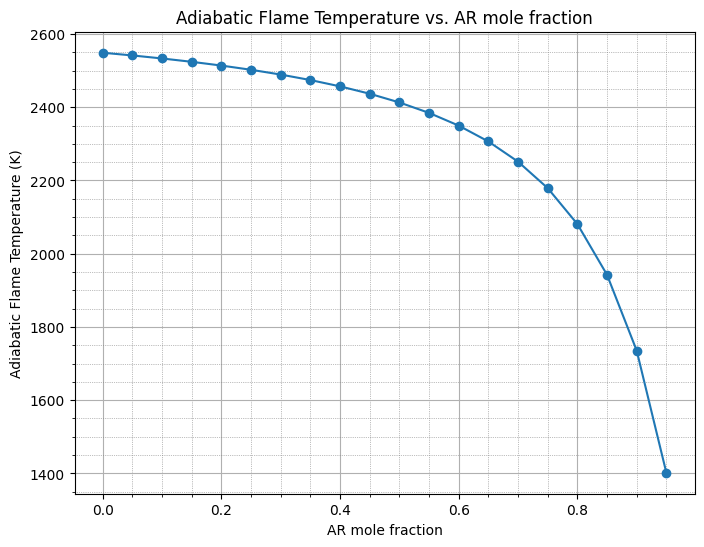

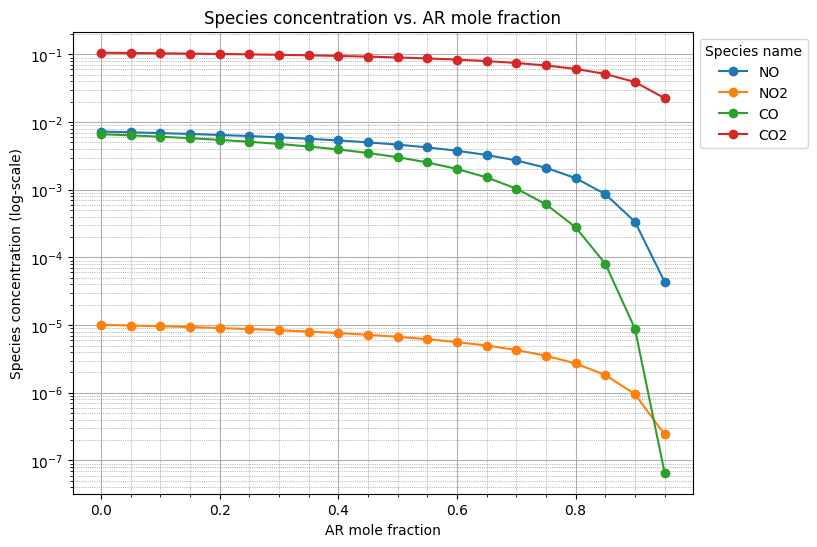

In [59]:
mole_faction_NO = np.zeros(len(AR_range))
mole_faction_NO2 = np.zeros(len(AR_range))
mole_faction_CO = np.zeros(len(AR_range))
mole_faction_CO2 = np.zeros(len(AR_range))

#print(len(pressure_variation))

#print(len(species_list_const_ER_Tin))
for i in range(0, len(AR_range)):
    #print(i)
    mole_faction_NO[i] = species_list_AR_variation[i][0]
    mole_faction_NO2[i] = species_list_AR_variation[i][1]
    mole_faction_CO[i] = species_list_AR_variation[i][2]
    mole_faction_CO2[i] = species_list_AR_variation[i][3]

print(mole_faction_NO) 
print(mole_faction_NO2) 
print(mole_faction_CO)
print(mole_faction_CO2)
print(T_adiabatic_EGR_AR)
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(AR_range, T_adiabatic_EGR_AR, marker='o')
plt.xlabel('AR mole fraction')
plt.ylabel('Adiabatic Flame Temperature (K)')
plt.title('Adiabatic Flame Temperature vs. AR mole fraction')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

plt.figure(figsize=(8, 6))
plt.semilogy(AR_range, mole_faction_NO, marker='o',label = 'NO')
plt.semilogy(AR_range, mole_faction_NO2, marker='o',label = 'NO2')
plt.semilogy(AR_range, mole_faction_CO, marker='o',label = 'CO')
plt.semilogy(AR_range, mole_faction_CO2, marker='o',label = 'CO2')

plt.xlabel('AR mole fraction')
plt.ylabel('Species concentration (log-scale)')
plt.title('Species concentration vs. AR mole fraction')
plt.legend(loc='upper left', title='Species name', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()